Drugie podejście do modelu

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os.path import join as JoinPath
from cmdstanpy import CmdStanModel, CmdStanMCMC
from scipy.stats import gaussian_kde
from typing import List
import arviz as az

In [52]:
# Pozyskiwanie zależności
eh = pd.read_csv('electricity_household' + '.tsv', sep='\t',header=0, index_col='country')
eh_mean_list = list(eh.mean())

ei = pd.read_csv('electricity_industry' + '.tsv', sep='\t',header=0, index_col='country')
ei_mean_list = list(ei.mean())

gh = pd.read_csv('gas_household' + '.tsv', sep='\t',header=0, index_col='country')
gh = gh.drop(['1990-S2 '], axis=1) # Usunięcie wymagane poniewać eurostat wykonał tutaj jeden dodatkowy punkt pomiarowy
gh_mean_list = list(gh.mean())

gi = pd.read_csv('gas_industry' + '.tsv', sep='\t',header=0, index_col='country')
gi_mean_list = list(gi.mean())

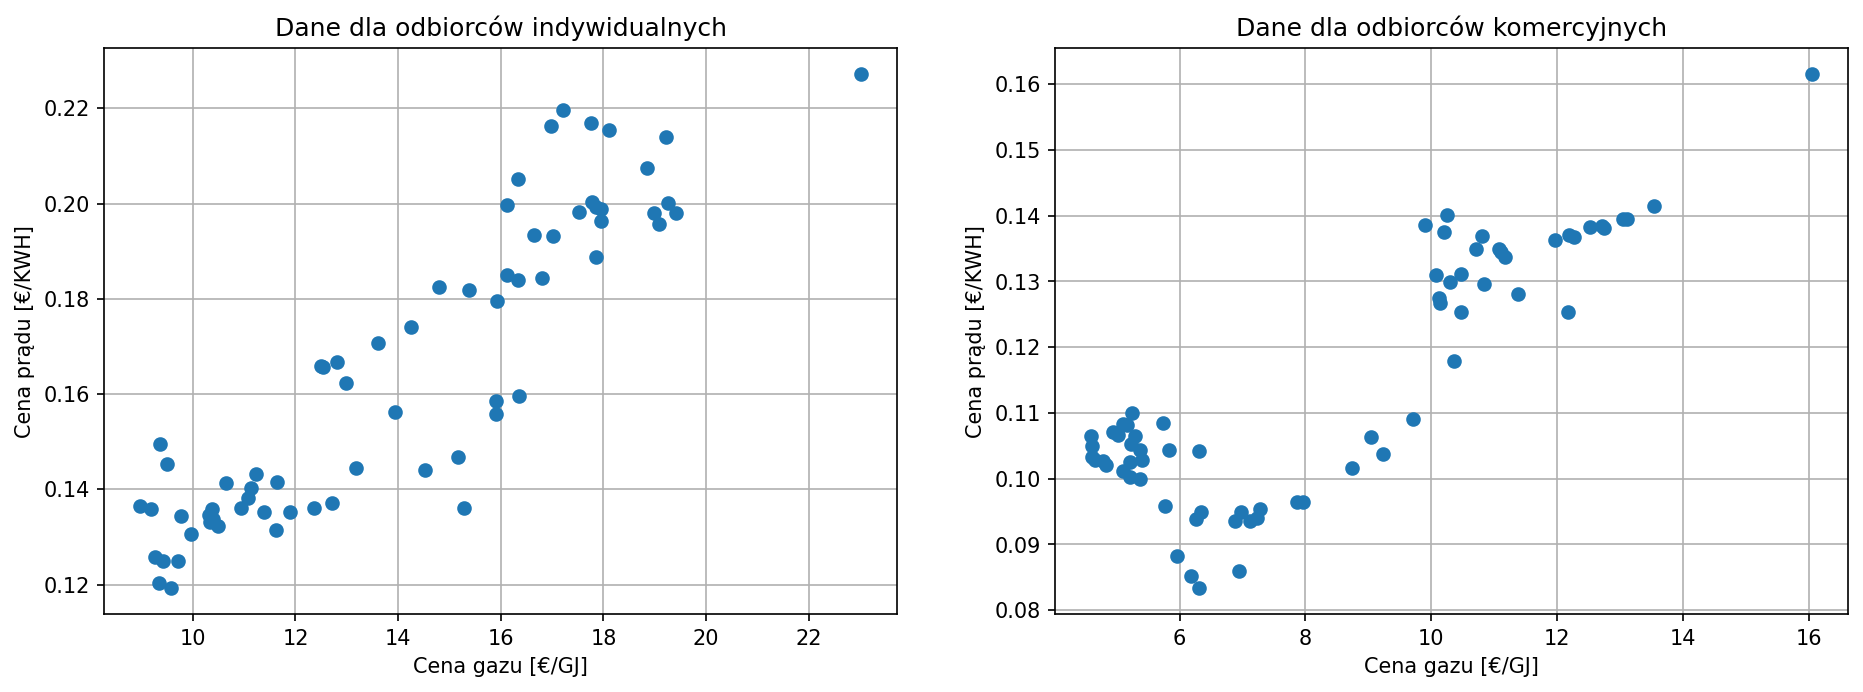

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), dpi=150)
plt.rcParams['axes.grid'] = True

ax1.plot(gh_mean_list, eh_mean_list, 'o')
ax1.set_title("Dane dla odbiorców indywidualnych")
ax1.set_xlabel("Cena gazu [€/GJ]")
ax1.set_ylabel("Cena prądu [€/KWH]")

ax2.plot(gi_mean_list, ei_mean_list, 'o')
ax2.set_title("Dane dla odbiorców komercyjnych")
ax2.set_xlabel("Cena gazu [€/GJ]")
ax2.set_ylabel("Cena prądu [€/KWH]")

plt.savefig('Input data.png', dpi=300, facecolor='w')
plt.show()

# Obliczenia przy użyciu STAN

In [54]:
# Numer modelu oznacza stopień wielomianu dopasowania
model_1_fit=CmdStanModel(stan_file=JoinPath('stan-files', 'model_1.stan'))
model_2_fit=CmdStanModel(stan_file=JoinPath('stan-files', 'model_2.stan'))
model_3_fit=CmdStanModel(stan_file=JoinPath('stan-files', 'model_3.stan'))
model_4_fit=CmdStanModel(stan_file=JoinPath('stan-files', 'model_4.stan'))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [55]:
def fit(model, x, y):
    data = {}
    data['N'] = len(x)
    data['x'] = x
    data['y'] = y
    return model.sample(data=data, seed=2137)

In [56]:
h_fit_degree1 = fit(model_1_fit, gh_mean_list, eh_mean_list)
h_fit_degree2 = fit(model_2_fit, gh_mean_list, eh_mean_list)
h_fit_degree3 = fit(model_3_fit, gh_mean_list, eh_mean_list)
h_fit_degree4 = fit(model_4_fit, gh_mean_list, eh_mean_list)

i_fit_degree1 = fit(model_1_fit, gi_mean_list, ei_mean_list)
i_fit_degree2 = fit(model_2_fit, gi_mean_list, ei_mean_list)
i_fit_degree3 = fit(model_3_fit, gi_mean_list, ei_mean_list)
i_fit_degree4 = fit(model_4_fit, gi_mean_list, ei_mean_list)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed          


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed         


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)




chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)





chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


# Funkcje plotujące

In [57]:
def PlotFitedData(x: List[float], y: List[float], fit_data: CmdStanMCMC, fit_degree: int, ax: plt.Axes, alternatedTitle: bool = False):
    alpha = np.mean(fit_data.stan_variable("alpha"))
    beta = np.mean(fit_data.stan_variable("beta"))
    gamma = None
    if fit_degree > 1:
        gamma = np.mean(fit_data.stan_variable("gamma"))
    delta = None
    if fit_degree > 2:
        delta = np.mean(fit_data.stan_variable("delta"))
    epsilon = None
    if fit_degree > 3:
        epsilon = np.mean(fit_data.stan_variable("epsilon"))
    sigma = np.mean(fit_data.stan_variable("sigma"))
    y_sim_to_mean = fit_data.stan_variable("y_sim")

    y_sim = []
    for i in range(len(x)):
        y_sim.append(y_sim_to_mean[2,i])

    dev = []
    if fit_degree == 1:
        dev = [alpha + beta*x_ for x_ in x]
    elif fit_degree == 2:
        dev = [alpha + beta*x_ + gamma*pow(x_,2) for x_ in x]
    elif fit_degree == 3:
        dev = [alpha + beta*x_ + gamma*pow(x_,2) + delta*pow(x_,3) for x_ in x]
    elif fit_degree == 4:
        dev = [alpha + beta*x_ + gamma*pow(x_,2) + delta*pow(x_,3) + epsilon*pow(x_,4) for x_ in x]
    else:
        print('Brak implementacji plotowania rzędu dopasowania')
        return None
    
    print(f'Dopasowanie wielomianem rzędu = {fit_degree} ------------------------------\nalpha = {alpha}, beta = {beta}, gamma = {gamma}, delta = {delta}, epsilon = {epsilon}\nsigma = {sigma}')
    
    upper_dev = [dev_ + sigma for dev_ in dev]
    lower_dev = [dev_ - sigma for dev_ in dev]

    ax.plot(x, y, 'ro', label='Orginalne dane')
    ax.plot(x, y_sim, 'bo', label='Wygenerowane dane')
    ax.plot(sorted(x), sorted(dev), 'tab:purple', label='Maksimum rozkładu normalnego')
    ax.plot(sorted(x), sorted(upper_dev), 'tab:orange', label='Dolne odchylenie rozkładu normalnego')
    ax.plot(sorted(x), sorted(lower_dev), 'tab:green', label='Górne odchylenie rozkładu normalnego')
    ax.set_xlabel("Cena gazu [€/GJ]")
    ax.set_ylabel("Cena prądu [€/KWH]")
    if not alternatedTitle:
        if fit_degree == 1:
            ax.set_title('Model α + βx\nα={:.5f},β={:.5f}; σ={:.5f}'.format(alpha, beta, sigma))
        elif fit_degree == 2:
            ax.set_title('Model α + βx + γx^2\nα={:.5f},β={:.5f},γ={:.5f}; σ={:.5f}'.format(alpha, beta, gamma, sigma))
        elif fit_degree == 3:
            ax.set_title('Model α + βx + γx^2 + δx^3\nα={:.5f},β={:.5f},γ={:.5f},δ={:.5f}; σ={:.5f}'.format(alpha, beta, gamma, delta, sigma))
        elif fit_degree == 4:
            ax.set_title('Model α + βx + γx^2 + δx^3 + εx^4\nα={:.5f},β={:.5f},γ={:.5f},δ={:.5f},ε={:.5f}; σ={:.5f}'.format(alpha, beta, gamma, delta, epsilon, sigma))
    else:
        if fit_degree == 1:
            ax.set_title('Model α + βx')
        elif fit_degree == 2:
            ax.set_title('Model α + βx + γx^2')
        elif fit_degree == 3:
            ax.set_title('Model α + βx + γx^2 + δx^3')
        elif fit_degree == 4:
            ax.set_title('Model α + βx + γx^2 + δx^3 + εx^4')
    return (alpha, beta, gamma, delta, epsilon, sigma)


def PlotProbabilityDensity(y: List[float], fit_data: CmdStanMCMC, fit_degree: int, ax: plt.Axes, densityNum: int = 15, linStart: int = 0, linEnd: int = 1, linNum: int = 500, alternatedTitle: bool = False):
    u = np.linspace(linStart, linEnd, linNum)
    y_sim = fit_data.stan_variable('y_sim')
    all_sim_density = []
    for i in range(densityNum):
        kernel = gaussian_kde(sorted(y_sim[i, :]))
        evaluation = kernel.evaluate(u)
        all_sim_density.append(evaluation)
        if i == densityNum-1:
            ax.plot(u, evaluation, 'g', linewidth=0.5, label='Simulated probability density - first {0}'.format(densityNum))
        elif i < densityNum:
            ax.plot(u, evaluation, 'g', linewidth=0.5)
    
    tmp_all_sim_density_array = [np.array(x) for x in all_sim_density]
    mean_sim_density = [np.mean(k) for k in zip(*tmp_all_sim_density_array)]
    ax.plot(u, mean_sim_density, 'b', linewidth=1.5, label='Mean simulated probability density')

    kernel = gaussian_kde(sorted(y))
    input_density = kernel.evaluate(u)
    ax.plot(u, input_density, 'r', linewidth=1.5, label='Probability density')

    if not alternatedTitle:
        if fit_degree == 1:
            ax.set_title('Model α + βx')
        elif fit_degree == 2:
            ax.set_title('Model α + βx + γx^2')
        elif fit_degree == 3:
            ax.set_title('Model α + βx + γx^2 + δx^3')
        elif fit_degree == 4:
            ax.set_title('Model α + βx + γx^2 + δx^3 + εx^4')
    else:
        ax.set_title('Probability density')
    return (input_density, mean_sim_density, u)

def PlotDensityDifference(original: List[float], simulated: List[float], u: List[float], fit_degree: int, ax: plt.Axes, alternatedTitle: bool = False) :
    '''
        Funkcja plotuje original - simulated
    '''
    density_difference = original - simulated
    ax.plot(u, density_difference, 'r', linewidth=1.5, label='Probability density difference')

    if not alternatedTitle:
        if fit_degree == 1:
            ax.set_title('Model α + βx')
        elif fit_degree == 2:
            ax.set_title('Model α + βx + γx^2')
        elif fit_degree == 3:
            ax.set_title('Model α + βx + γx^2 + δx^3')
        elif fit_degree == 4:
            ax.set_title('Model α + βx + γx^2 + δx^3 + εx^4')
    else:
        ax.set_title('Total mean probability density difference')
    print('Total difference:', np.sum(np.abs(density_difference)))
    return density_difference

def PlotFitParameterHistograms(fit_data: CmdStanMCMC, fit_deegre: int, title: str):
    '''
        Funkcja plotuje histogramy parametrów
    '''
    y_sim_to_mean = fit_data.stan_variable("y_sim")
    y_sim = []
    for i in range(y_sim_to_mean.shape[1]):
        y_sim.append(y_sim_to_mean[2,i])

    PltCount = 1
    f = None
    PltSize = None
    if fit_deegre <= 3:
        PltSize = 230
        f = plt.figure(figsize=(20,10), dpi=150)
    elif fit_deegre <= 4:
        PltSize = 330
        f = plt.figure(figsize=(20,15), dpi=150)
    else:
        print('Niewspierany stopień dopasowania')
        return None
    plt.grid(True)

    plt.subplot(PltSize + PltCount)
    PltCount += 1
    plt.hist(fit_data.stan_variable('alpha'), bins=20, density=True)
    plt.title('Alpha distribution')
    
    plt.subplot(PltSize + PltCount)
    PltCount += 1
    plt.hist(fit_data.stan_variable('beta'), bins=20, density=True)
    plt.title('Beta distribution')

    if fit_deegre >= 2:
        plt.subplot(PltSize + PltCount)
        PltCount += 1
        plt.hist(fit_data.stan_variable('gamma'), bins=20, density=True)
        plt.title('Gamma distribution')

    if fit_deegre >= 3:
        plt.subplot(PltSize + PltCount)
        PltCount += 1
        plt.hist(fit_data.stan_variable('delta'), bins=20, density=True)
        plt.title('Delta distribution')

    if fit_deegre >= 4:
        plt.subplot(PltSize + PltCount)
        PltCount += 1
        plt.hist(fit_data.stan_variable('epsilon'), bins=20, density=True)
        plt.title('Epsilon distribution')
    
    plt.subplot(PltSize + PltCount)
    PltCount += 1
    plt.hist(fit_data.stan_variable('sigma'), bins=20, density=True)
    plt.title('Sigma distribution')
    
    plt.subplot(PltSize + PltCount)
    PltCount += 1
    plt.hist(y_sim, bins=20, density=True)
    plt.title('Simulated data distribution')

    f.suptitle(title, fontsize=16)
    plt.savefig('Histograms ' + title + '.png', dpi=300, facecolor='w')
    plt.show()


def AzPostirior(fit_1: CmdStanMCMC, fit_2: CmdStanMCMC, title: str):
    f, axs = plt.subplots(1, 2, figsize=(12,6), dpi=150)
    az.plot_posterior(fit_1, var_names=['y_sim'], kind='hist', bins=20, ax=axs[0])
    axs[0].set_xlabel('Model deegree 1')
    az.plot_posterior(fit_2, var_names=['y_sim'], kind='hist', bins=20, ax=axs[1])
    axs[1].set_xlabel('Model deegree 4')
    
    f.suptitle(title, fontsize=16)
    plt.savefig('Az postirior ' + title + '.png', dpi=300, facecolor='w')
    plt.show()


# Wyświetlanie danych wynikowych dopasowania

Dopasowanie wielomianem rzędu = 1 ------------------------------
alpha = 0.05172226747499999, beta = 0.0080438771525, gamma = None, delta = None, epsilon = None
sigma = 0.013577568875000001
Dopasowanie wielomianem rzędu = 2 ------------------------------
alpha = 0.0744602317, beta = 0.004660815703500001, gamma = 0.00011834113652375, delta = None, epsilon = None
sigma = 0.013566707025
Dopasowanie wielomianem rzędu = 3 ------------------------------
alpha = 0.0800546377, beta = 0.004249666350174999, gamma = 8.713580855427499e-05, delta = 2.0393261086965e-06, epsilon = None
sigma = 0.013667375625
Dopasowanie wielomianem rzędu = 4 ------------------------------
alpha = 0.08321071477500001, beta = 0.00406172242625, gamma = 7.561649316124749e-05, delta = 1.7719409673201499e-06, epsilon = 5.12730011519e-08
sigma = 0.013787190249999998


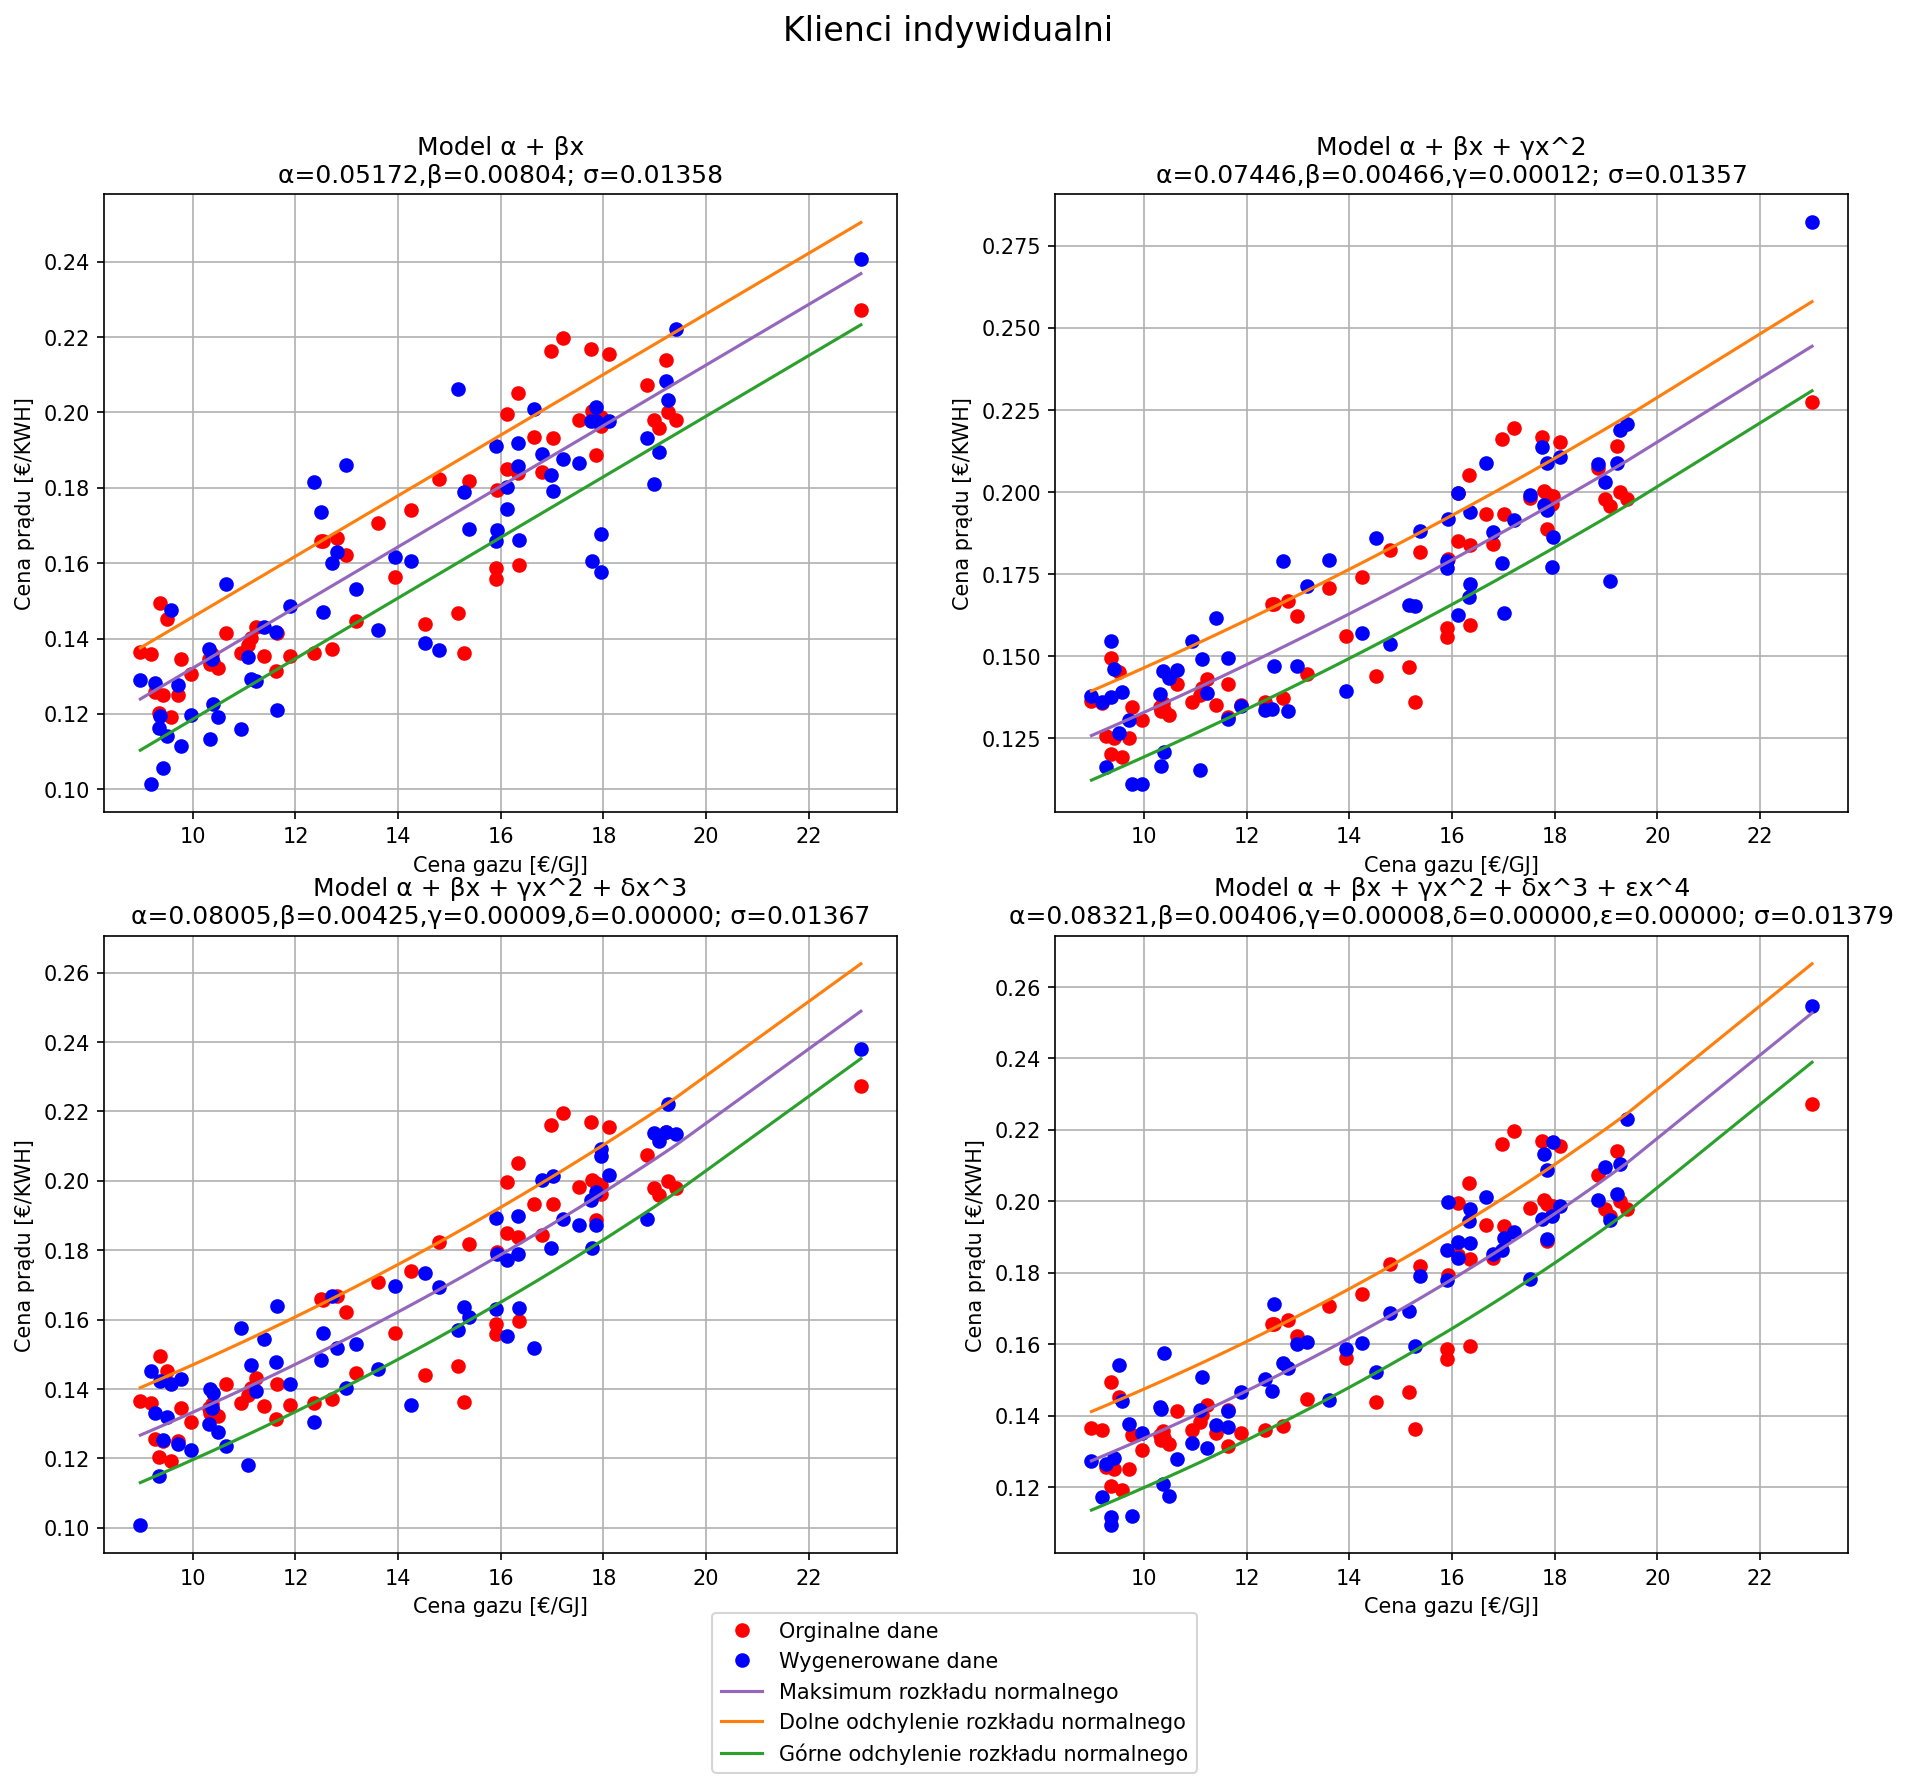

In [58]:
f, axs = plt.subplots(2, 2, figsize=(15,12), dpi=150)

PlotFitedData(gh_mean_list, eh_mean_list, h_fit_degree1, 1, axs[0, 0])
PlotFitedData(gh_mean_list, eh_mean_list, h_fit_degree2, 2, axs[0, 1])
PlotFitedData(gh_mean_list, eh_mean_list, h_fit_degree3, 3, axs[1, 0])
PlotFitedData(gh_mean_list, eh_mean_list, h_fit_degree4, 4, axs[1, 1])

f.suptitle('Klienci indywidualni', fontsize=16)
plt.rcParams['axes.grid'] = True
handles, labels = axs[0, 0].get_legend_handles_labels()
f.legend(handles, labels, loc='lower center')
plt.savefig('Dopasowanie klienci indywidualni.png', dpi=300, facecolor='w')
plt.show()

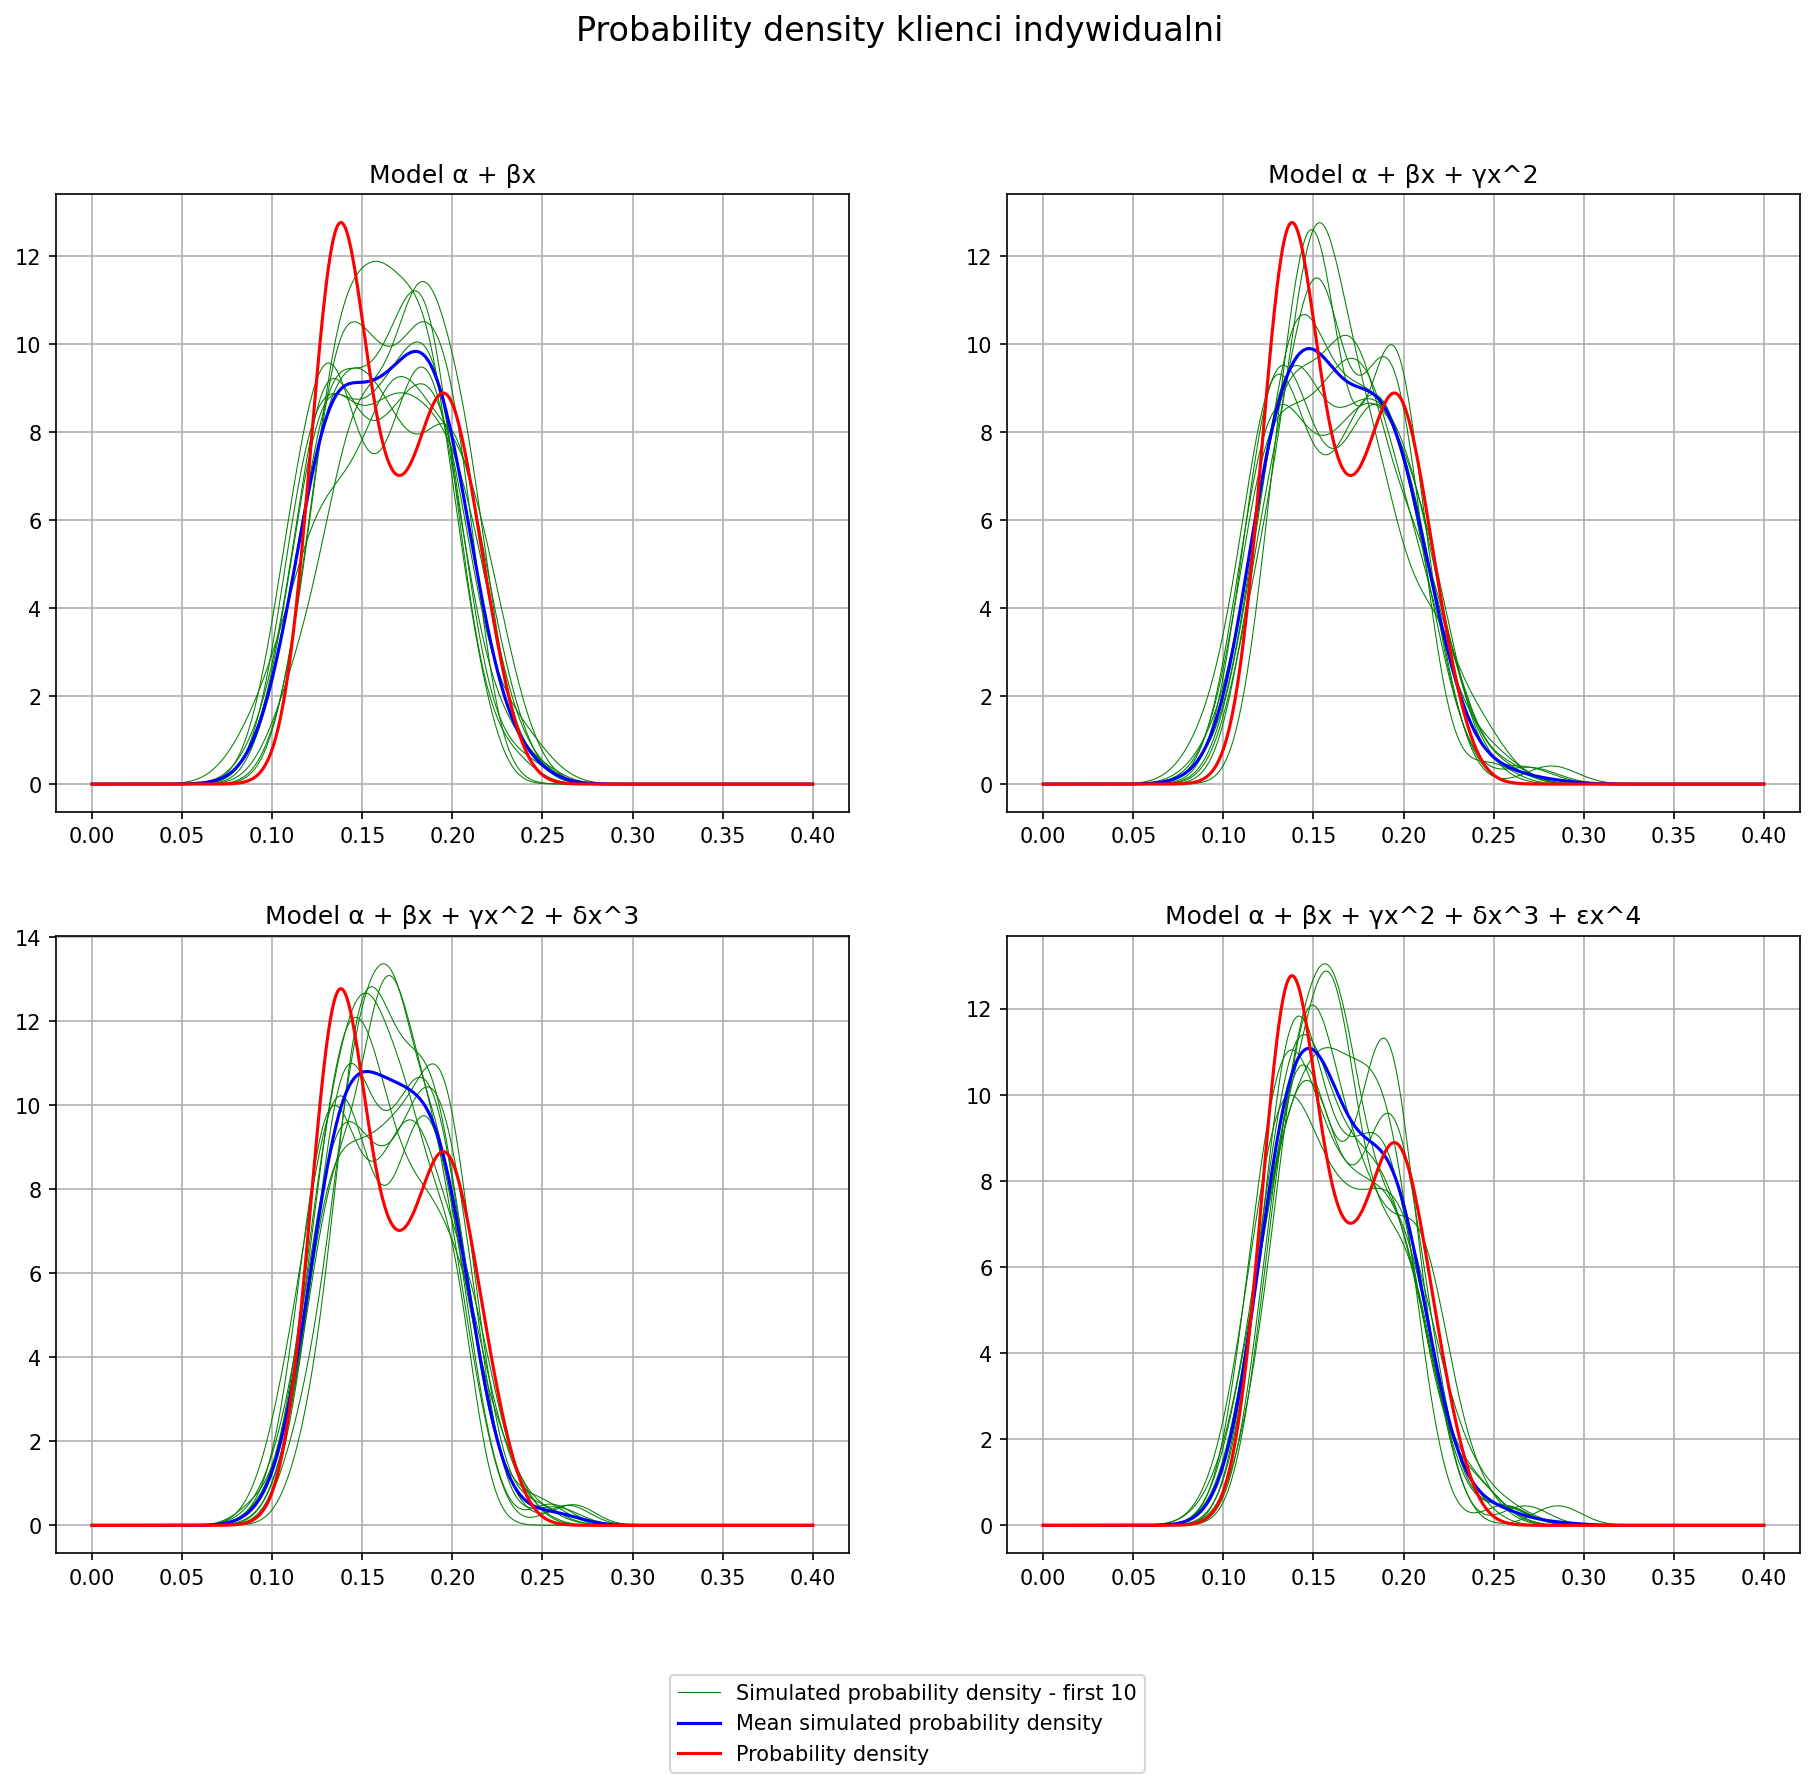

In [59]:
f, axs = plt.subplots(2, 2, figsize=(15,12), dpi=150)

(h_density1, h_sim_density1, uh1) = PlotProbabilityDensity(eh_mean_list, h_fit_degree1, 1, axs[0, 0], densityNum=10, linEnd=0.4)
(h_density2, h_sim_density2, uh2) = PlotProbabilityDensity(eh_mean_list, h_fit_degree2, 2, axs[0, 1], densityNum=10, linEnd=0.4)
(h_density3, h_sim_density3, uh3) = PlotProbabilityDensity(eh_mean_list, h_fit_degree3, 3, axs[1, 0], densityNum=10, linEnd=0.4)
(h_density4, h_sim_density4, uh4) = PlotProbabilityDensity(eh_mean_list, h_fit_degree4, 4, axs[1, 1], densityNum=10, linEnd=0.4)

f.suptitle('Probability density klienci indywidualni', fontsize=16)
plt.rcParams['axes.grid'] = True
handles, labels = axs[0, 0].get_legend_handles_labels()
f.legend(handles, labels, loc='lower center')
plt.savefig('Probability density klienci indywidualni.png', dpi=300, facecolor='w')
plt.show()

Total difference: 290.9177144135513
Total difference: 253.52038222731795
Total difference: 293.85320871439944
Total difference: 233.1390525160547


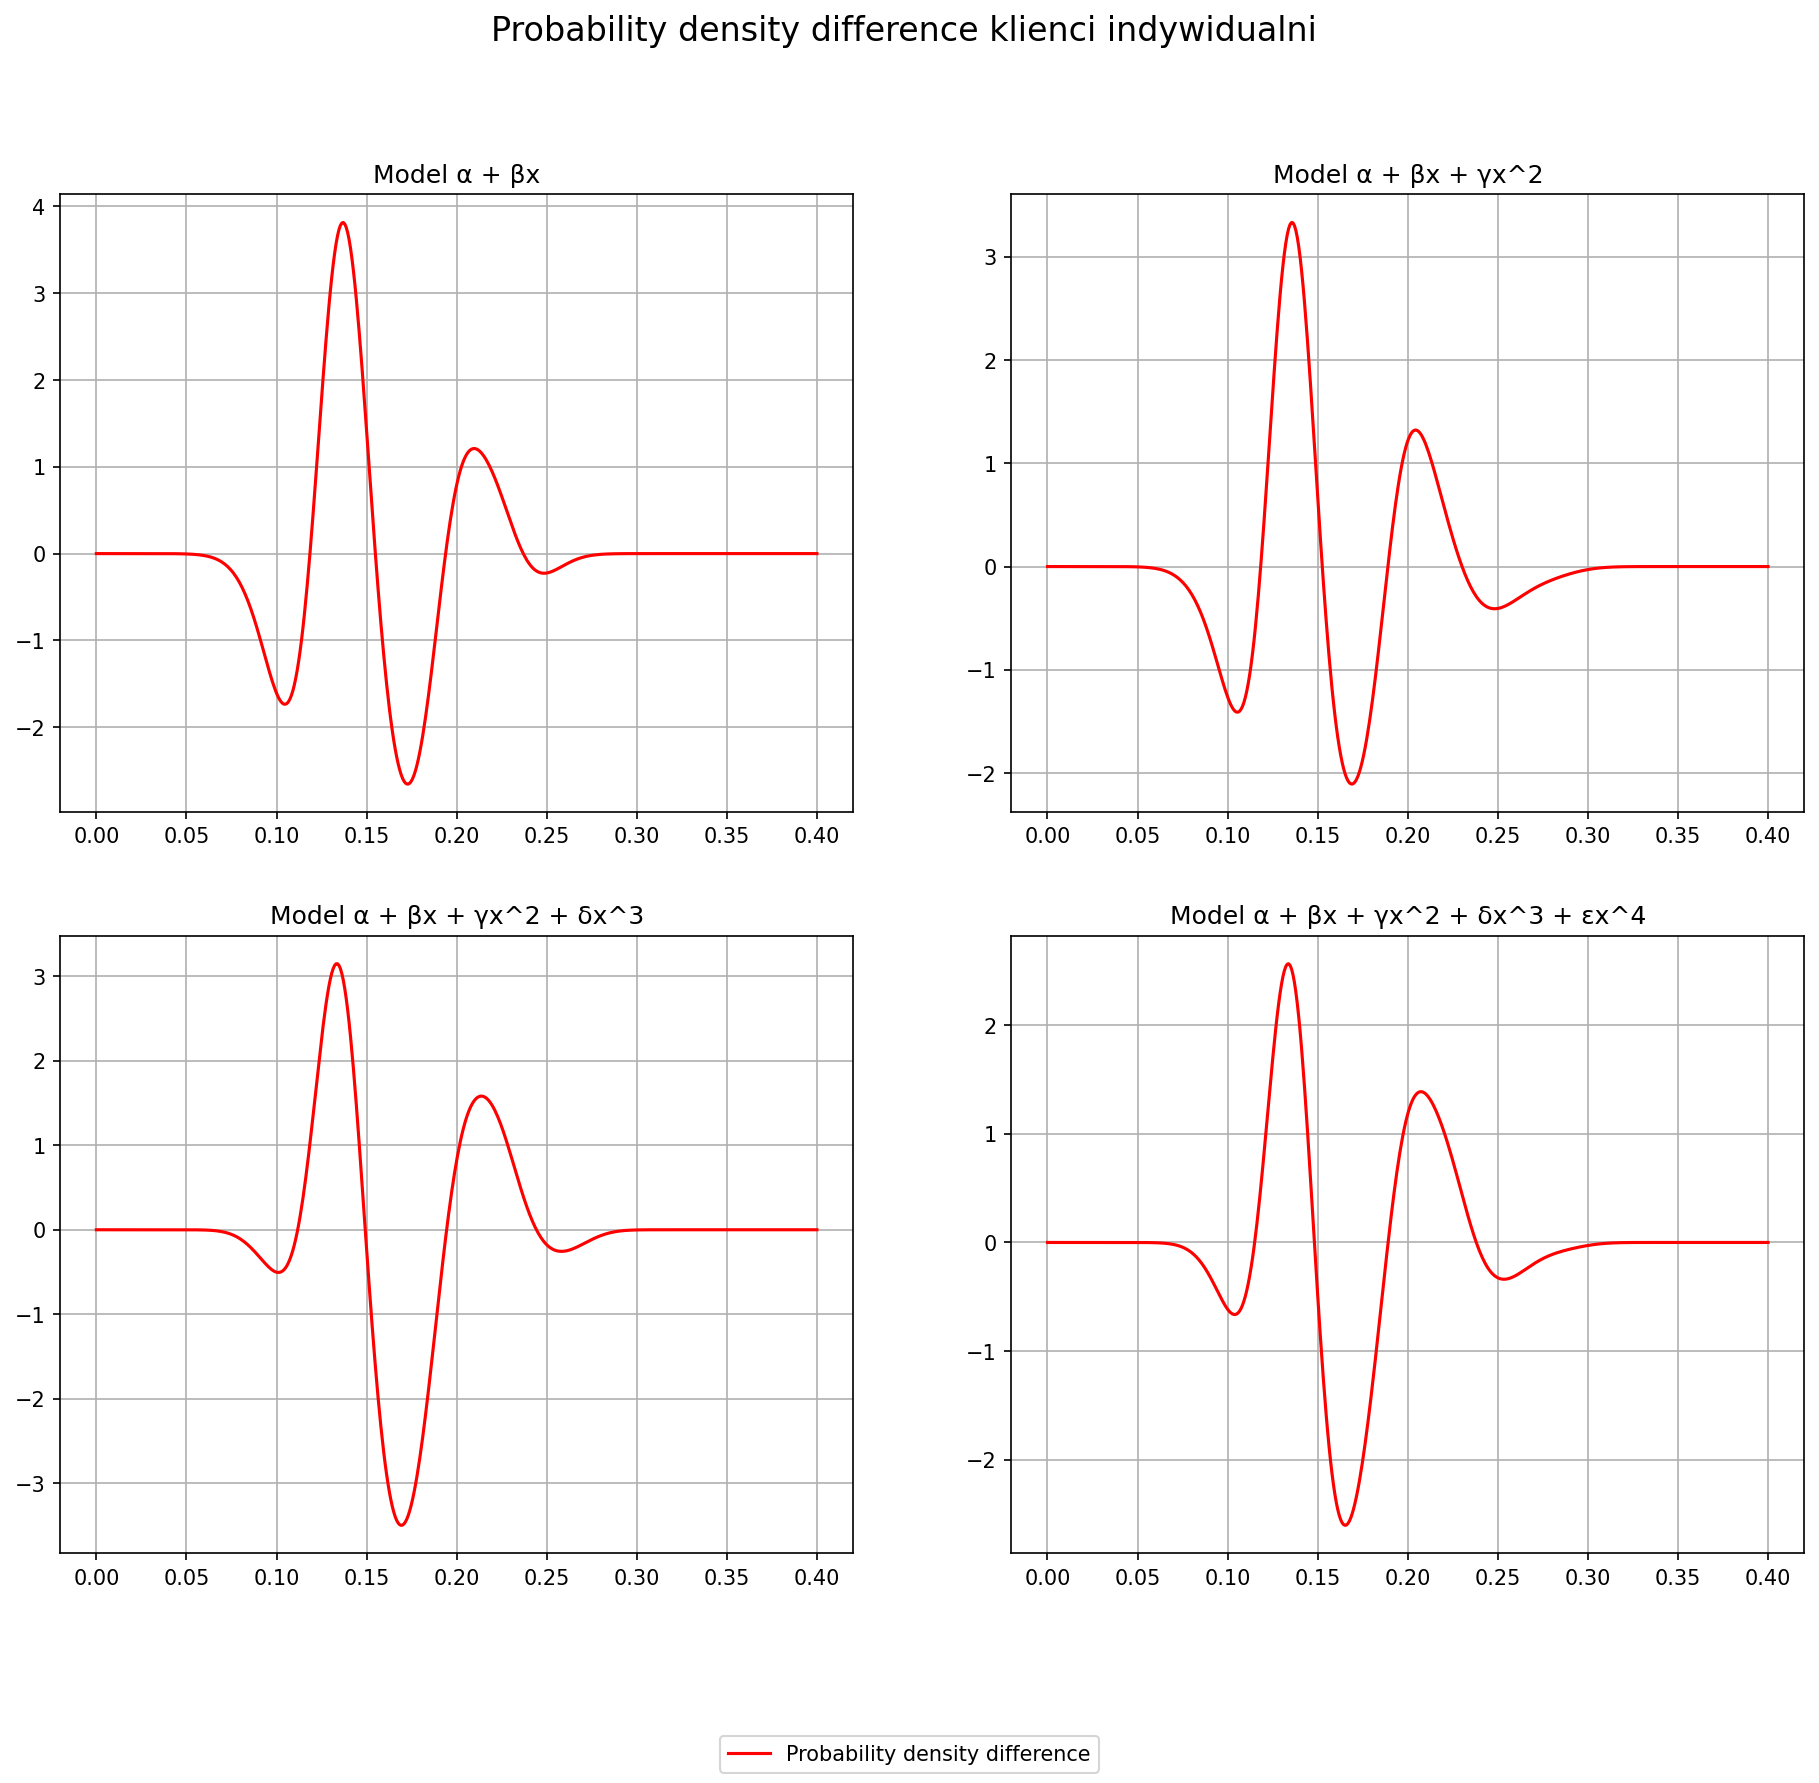

In [60]:
f, axs = plt.subplots(2, 2, figsize=(15,12), dpi=150)

PlotDensityDifference(h_density1, h_sim_density1, uh1, 1, axs[0, 0])
PlotDensityDifference(h_density2, h_sim_density2, uh2, 2, axs[0, 1])
PlotDensityDifference(h_density3, h_sim_density3, uh3, 3, axs[1, 0])
PlotDensityDifference(h_density4, h_sim_density4, uh4, 4, axs[1, 1])

f.suptitle('Probability density difference klienci indywidualni', fontsize=16)
plt.rcParams['axes.grid'] = True
handles, labels = axs[0, 0].get_legend_handles_labels()
f.legend(handles, labels, loc='lower center')
plt.savefig('Probability density difference klienci indywidualni.png', dpi=300, facecolor='w')
plt.show()

Dopasowanie wielomianem rzędu = 1 ------------------------------
alpha = 0.070612373375, beta = 0.005256523282500001, gamma = None, delta = None, epsilon = None
sigma = 0.009969896092500001
Dopasowanie wielomianem rzędu = 2 ------------------------------
alpha = 0.08559552715, beta = 0.0014713698672175, gamma = 0.000212714344275, delta = None, epsilon = None
sigma = 0.009546857725
Dopasowanie wielomianem rzędu = 3 ------------------------------
alpha = 0.08811872035000001, beta = 0.0012956335672275, gamma = 0.00012543671135425, delta = 7.0634547945775e-06, epsilon = None
sigma = 0.0094360180625
Dopasowanie wielomianem rzędu = 4 ------------------------------
alpha = 0.08849043075, beta = 0.0013734876060674998, gamma = 0.000108631215054075, delta = 5.1242871224475e-06, epsilon = 2.07216953686e-07
sigma = 0.009529280942500001


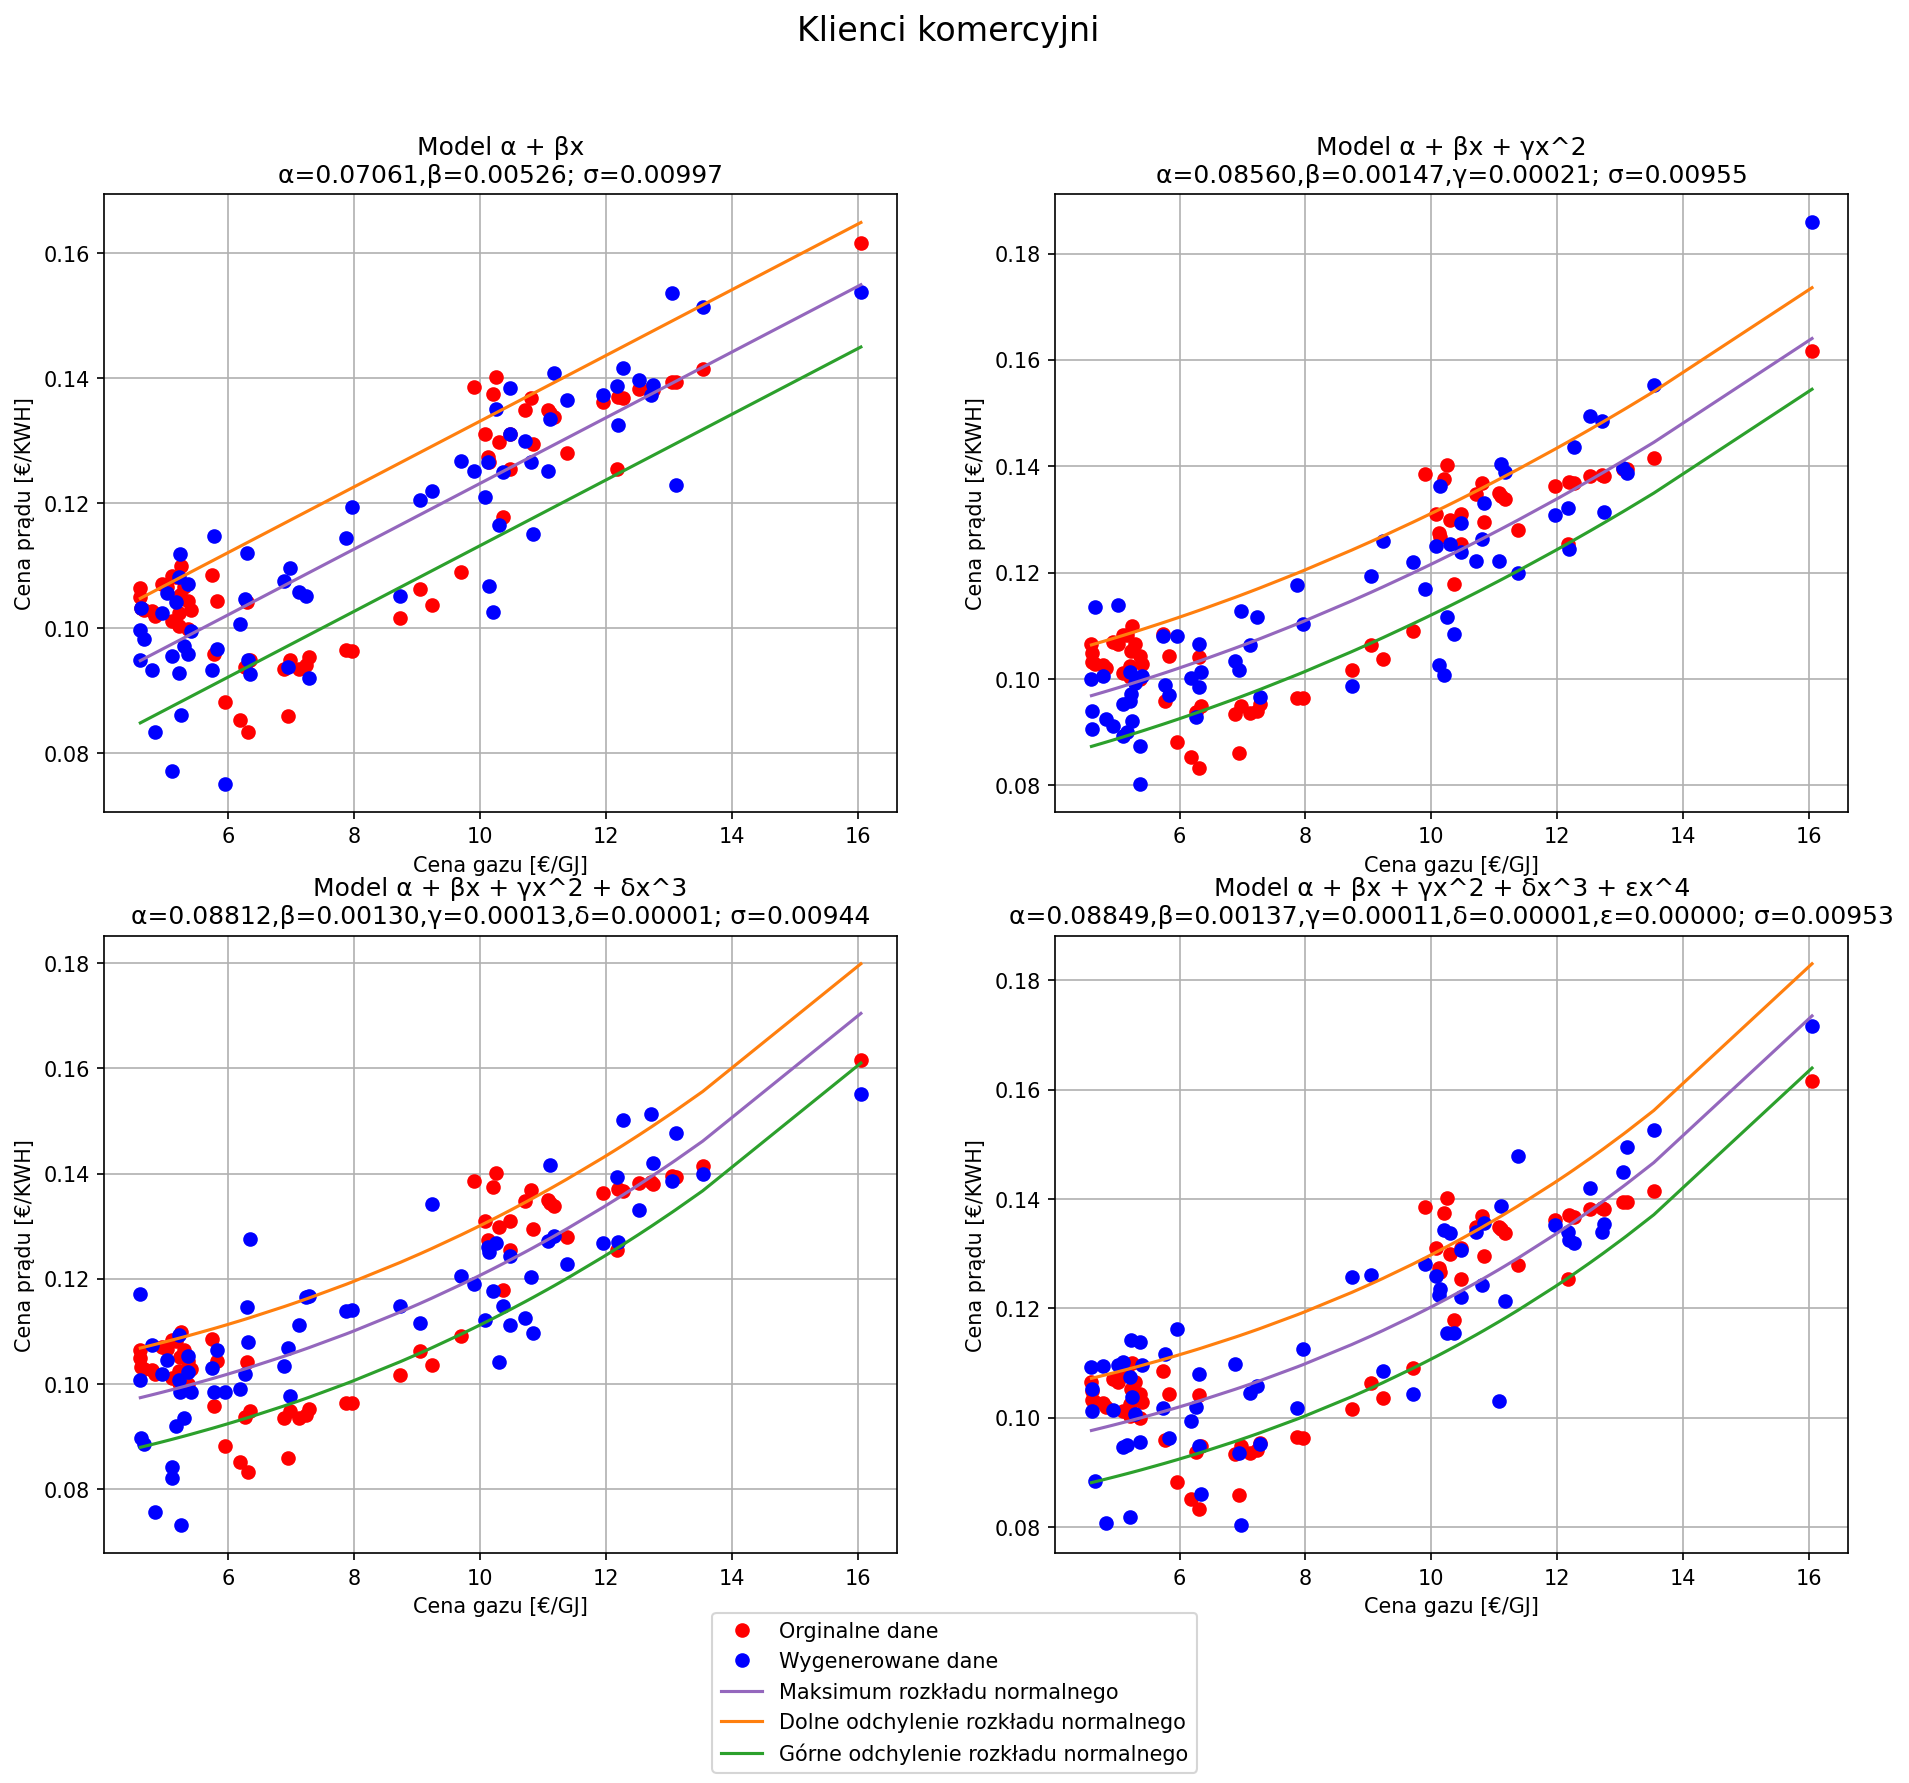

In [61]:
f, axs = plt.subplots(2, 2, figsize=(15,12), dpi=150)

PlotFitedData(gi_mean_list, ei_mean_list, i_fit_degree1, 1, axs[0, 0])
PlotFitedData(gi_mean_list, ei_mean_list, i_fit_degree2, 2, axs[0, 1])
PlotFitedData(gi_mean_list, ei_mean_list, i_fit_degree3, 3, axs[1, 0])
PlotFitedData(gi_mean_list, ei_mean_list, i_fit_degree4, 4, axs[1, 1])

f.suptitle('Klienci komercyjni', fontsize=16)
plt.rcParams['axes.grid'] = True
handles, labels = axs[0, 0].get_legend_handles_labels()
f.legend(handles, labels, loc='lower center')
plt.savefig('Dopasowanie klienci komercyjni.png', dpi=300, facecolor='w')
plt.show()

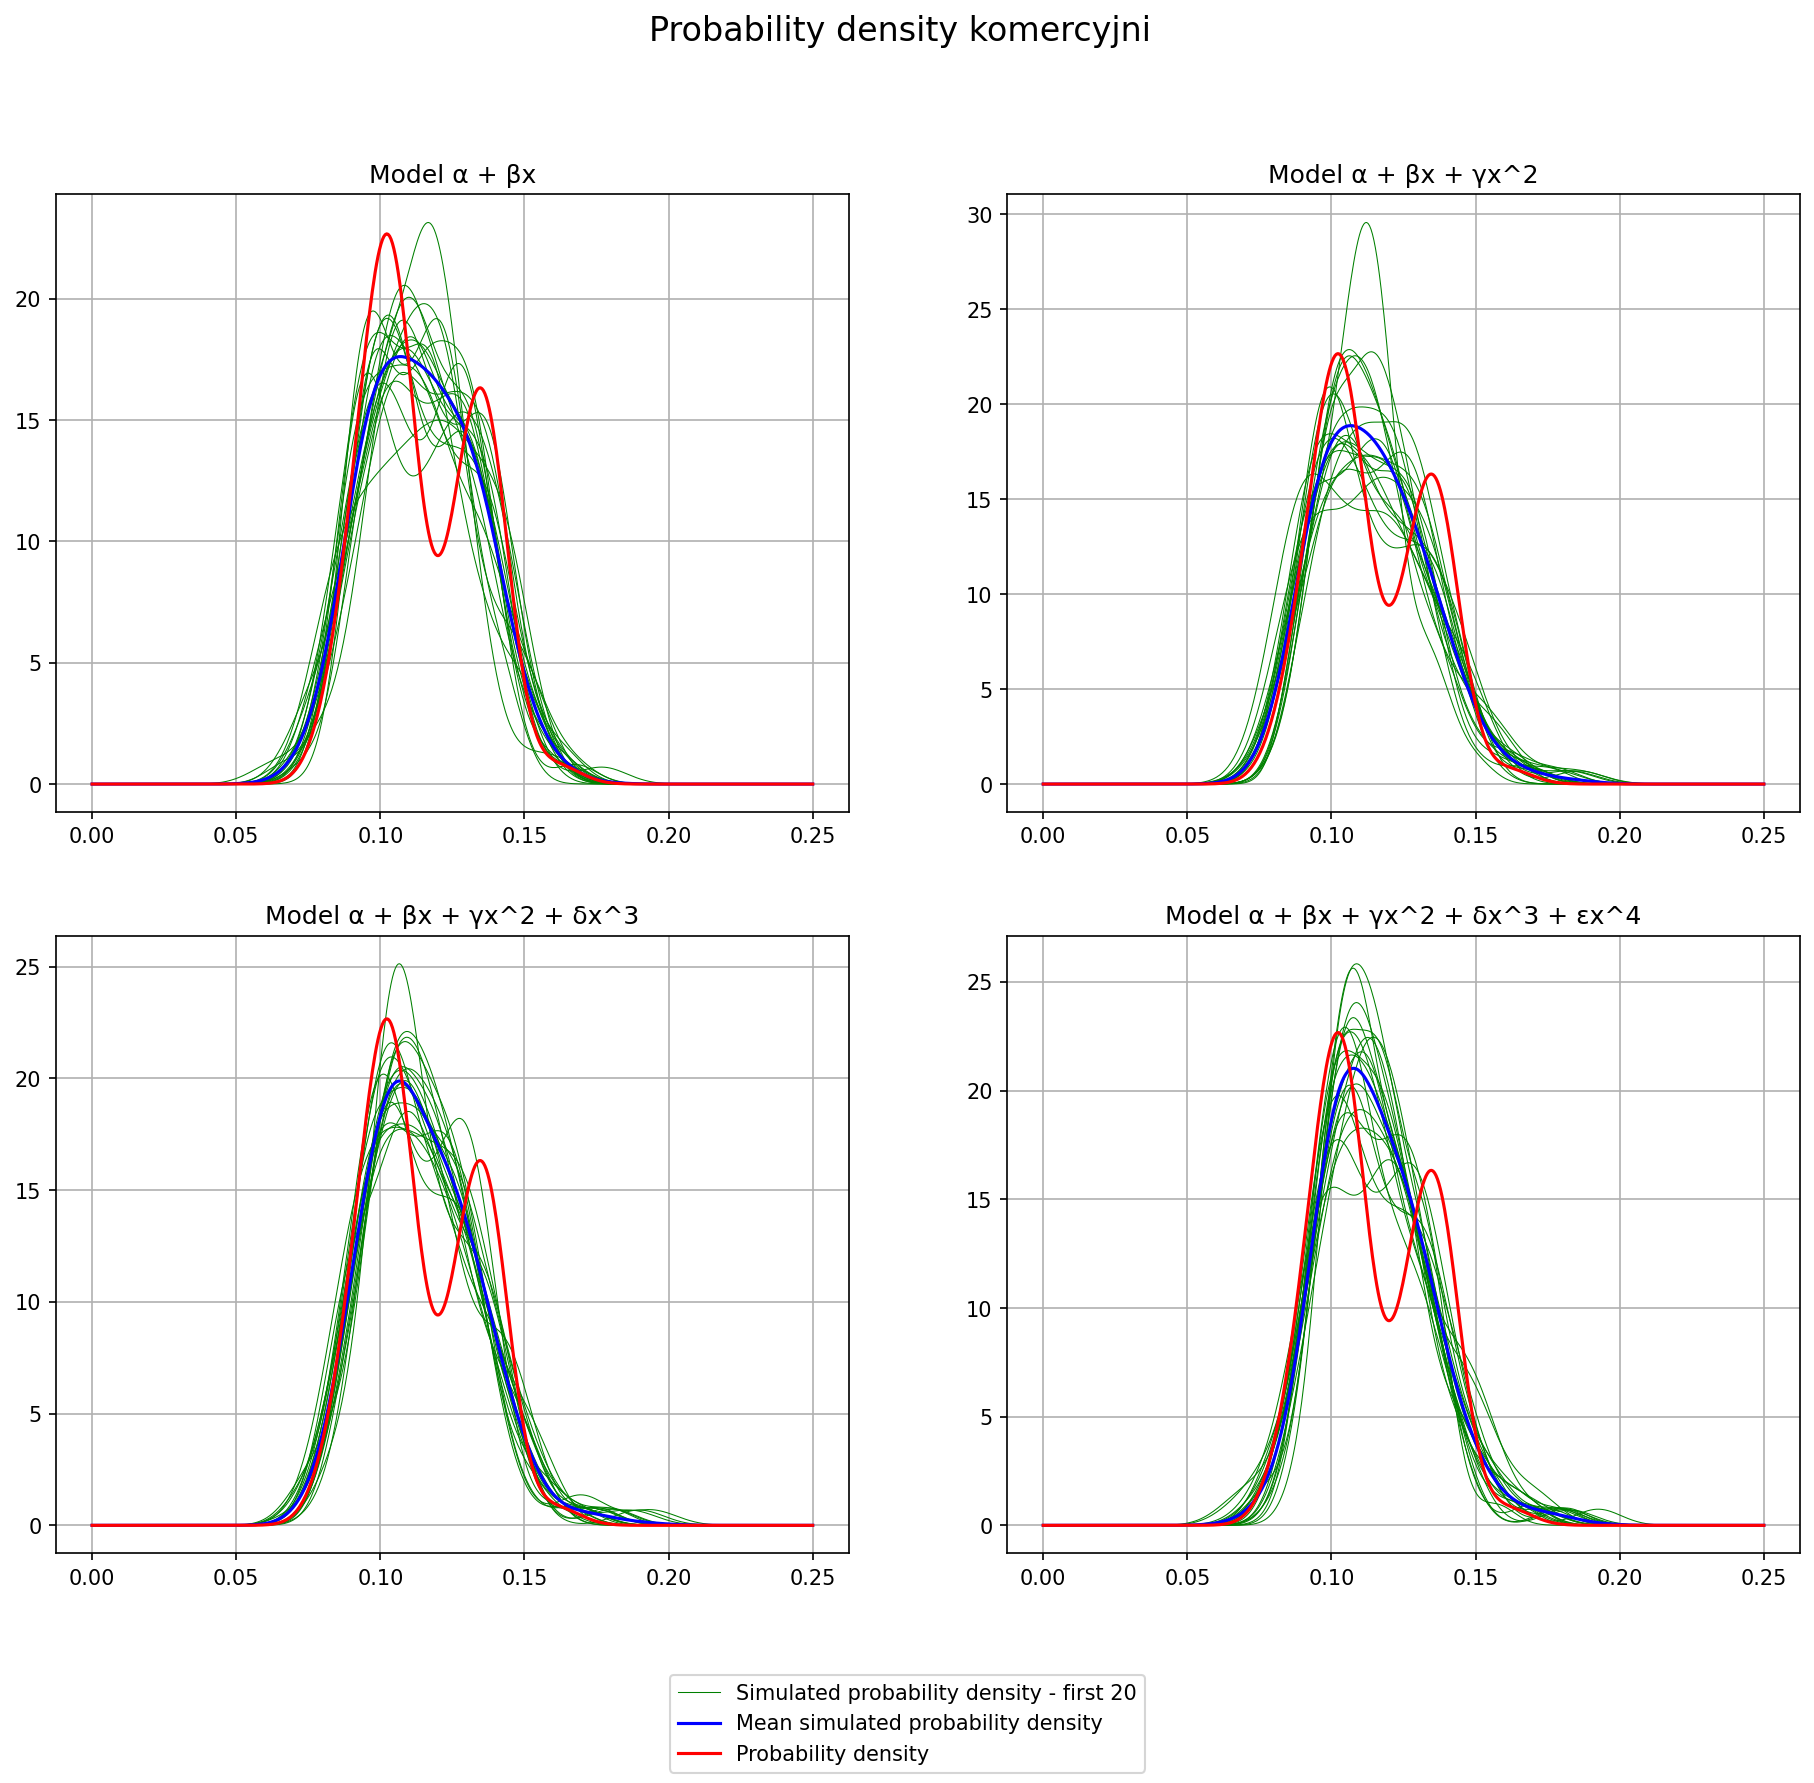

In [62]:
f, axs = plt.subplots(2, 2, figsize=(15,12), dpi=150)

(i_density1, i_sim_density1, ui1) = PlotProbabilityDensity(ei_mean_list, i_fit_degree1, 1, axs[0, 0], densityNum=20, linEnd=0.25)
(i_density2, i_sim_density2, ui2) = PlotProbabilityDensity(ei_mean_list, i_fit_degree2, 2, axs[0, 1], densityNum=20, linEnd=0.25)
(i_density3, i_sim_density3, ui3) = PlotProbabilityDensity(ei_mean_list, i_fit_degree3, 3, axs[1, 0], densityNum=20, linEnd=0.25)
(i_density4, i_sim_density4, ui4) = PlotProbabilityDensity(ei_mean_list, i_fit_degree4, 4, axs[1, 1], densityNum=20, linEnd=0.25)

f.suptitle('Probability density komercyjni', fontsize=16)
plt.rcParams['axes.grid'] = True
handles, labels = axs[0, 0].get_legend_handles_labels()
f.legend(handles, labels, loc='lower center')
plt.savefig('Probability density komercyjni.png', dpi=300, facecolor='w')
plt.show()

Total difference: 482.32213821685855
Total difference: 501.5853502463847
Total difference: 496.4551539933094
Total difference: 578.8071592513314


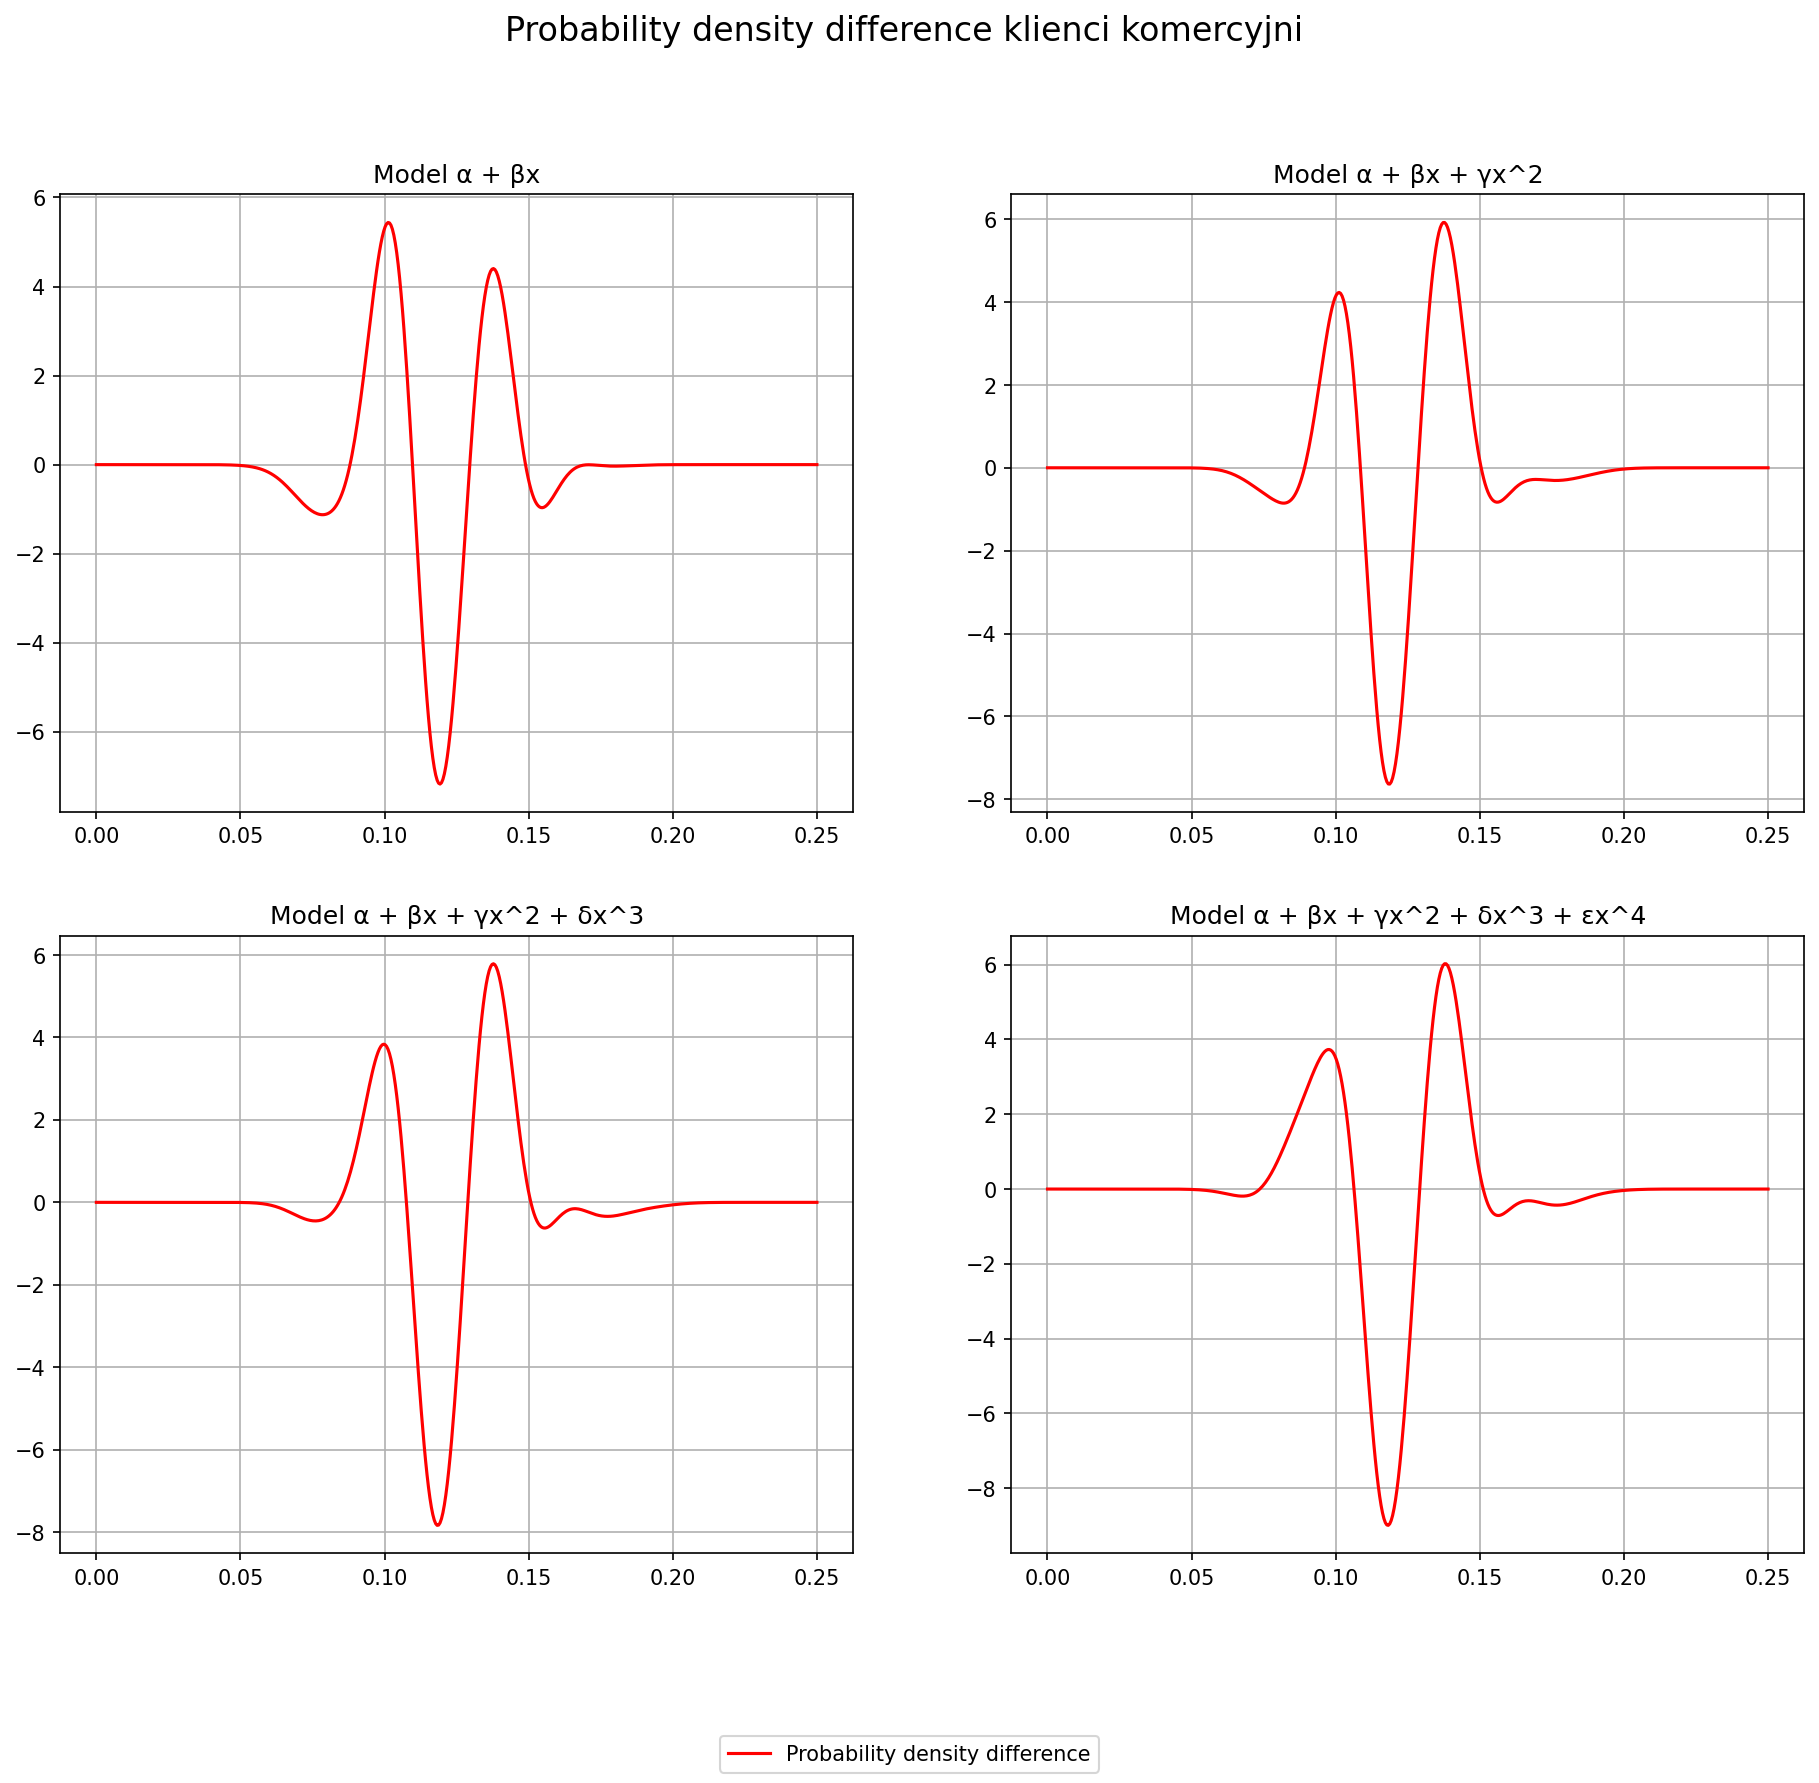

In [63]:
f, axs = plt.subplots(2, 2, figsize=(15,12), dpi=150)

PlotDensityDifference(i_density1, i_sim_density1, ui1, 1, axs[0, 0])
PlotDensityDifference(i_density2, i_sim_density2, ui2, 2, axs[0, 1])
PlotDensityDifference(i_density3, i_sim_density3, ui3, 3, axs[1, 0])
PlotDensityDifference(i_density4, i_sim_density4, ui4, 4, axs[1, 1])

f.suptitle('Probability density difference klienci komercyjni', fontsize=16)
plt.rcParams['axes.grid'] = True
handles, labels = axs[0, 0].get_legend_handles_labels()
f.legend(handles, labels, loc='lower center')
plt.savefig('Probability density difference klienci komercyjni.png', dpi=300, facecolor='w')
plt.show()

# Zestawienie danych dla oficjalnych modeli

Dopasowanie wielomianem rzędu = 1 ------------------------------
alpha = 0.05172226747499999, beta = 0.0080438771525, gamma = None, delta = None, epsilon = None
sigma = 0.013577568875000001
Total difference: 459.7887985345649
Dopasowanie wielomianem rzędu = 4 ------------------------------
alpha = 0.08321071477500001, beta = 0.00406172242625, gamma = 7.561649316124749e-05, delta = 1.7719409673201499e-06, epsilon = 5.12730011519e-08
sigma = 0.013787190249999998
Total difference: 355.63772402535653


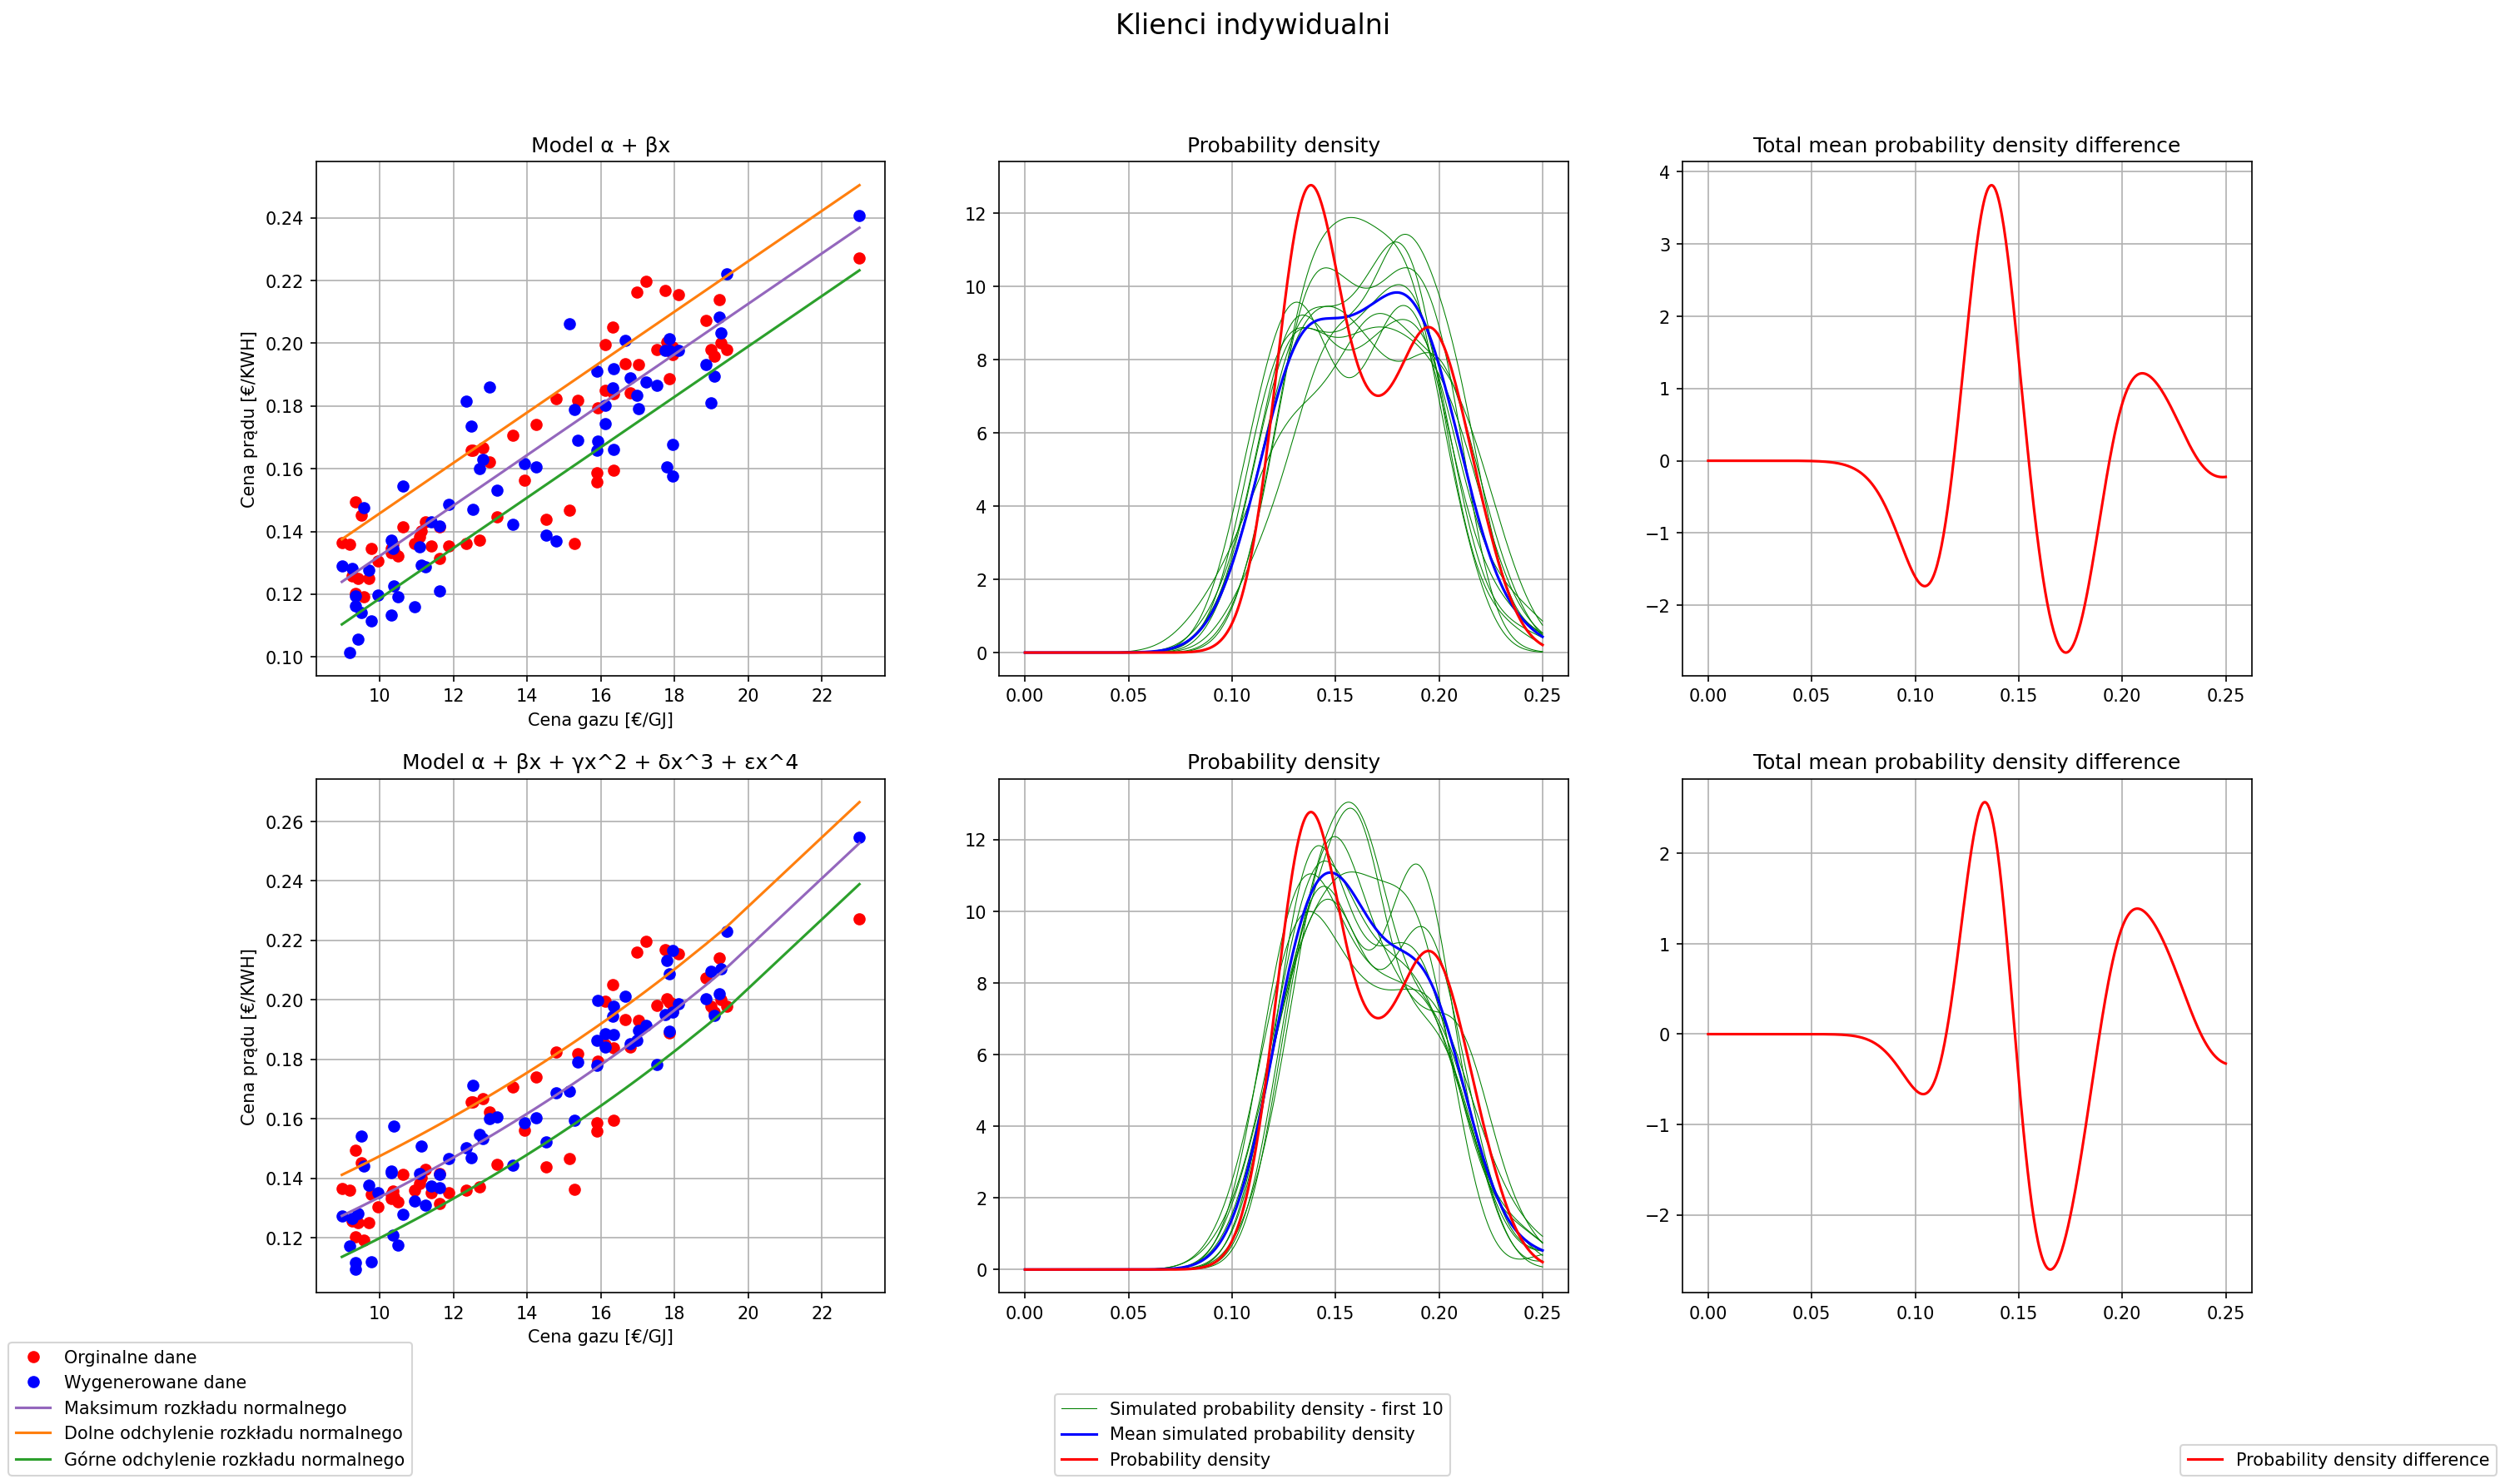

In [64]:
f, axs = plt.subplots(2, 3, figsize=(20,12), dpi=150)

# Wielomian stopnia 1
PlotFitedData(gh_mean_list, eh_mean_list, h_fit_degree1, 1, axs[0, 0], alternatedTitle=True)
(h_density1, h_sim_density1, uh1) = PlotProbabilityDensity(eh_mean_list, h_fit_degree1, 1, axs[0, 1], densityNum=10, linEnd=0.25, alternatedTitle=True)
PlotDensityDifference(h_density1, h_sim_density1, uh1, 1, axs[0, 2], alternatedTitle=True)

# Wielomian stopnia 4
PlotFitedData(gh_mean_list, eh_mean_list, h_fit_degree4, 4, axs[1, 0], alternatedTitle=True)
(h_density4, h_sim_density4, uh4) = PlotProbabilityDensity(eh_mean_list, h_fit_degree4, 4, axs[1, 1], densityNum=10, linEnd=0.25, alternatedTitle=True)
PlotDensityDifference(h_density4, h_sim_density4, uh4, 4, axs[1, 2], alternatedTitle=True)

f.suptitle('Klienci indywidualni', fontsize=16)
plt.rcParams['axes.grid'] = True

handles1, labels1 = axs[0, 0].get_legend_handles_labels()
handles2, labels2 = axs[0, 1].get_legend_handles_labels()
handles3, labels3 = axs[0, 2].get_legend_handles_labels()

f.legend(handles1, labels1, loc='lower left')
f.legend(handles2, labels2, loc='lower center')
f.legend(handles3, labels3, loc='lower right')

plt.savefig('Klienci indywidualni - all.png', dpi=300, facecolor='w')
plt.show()

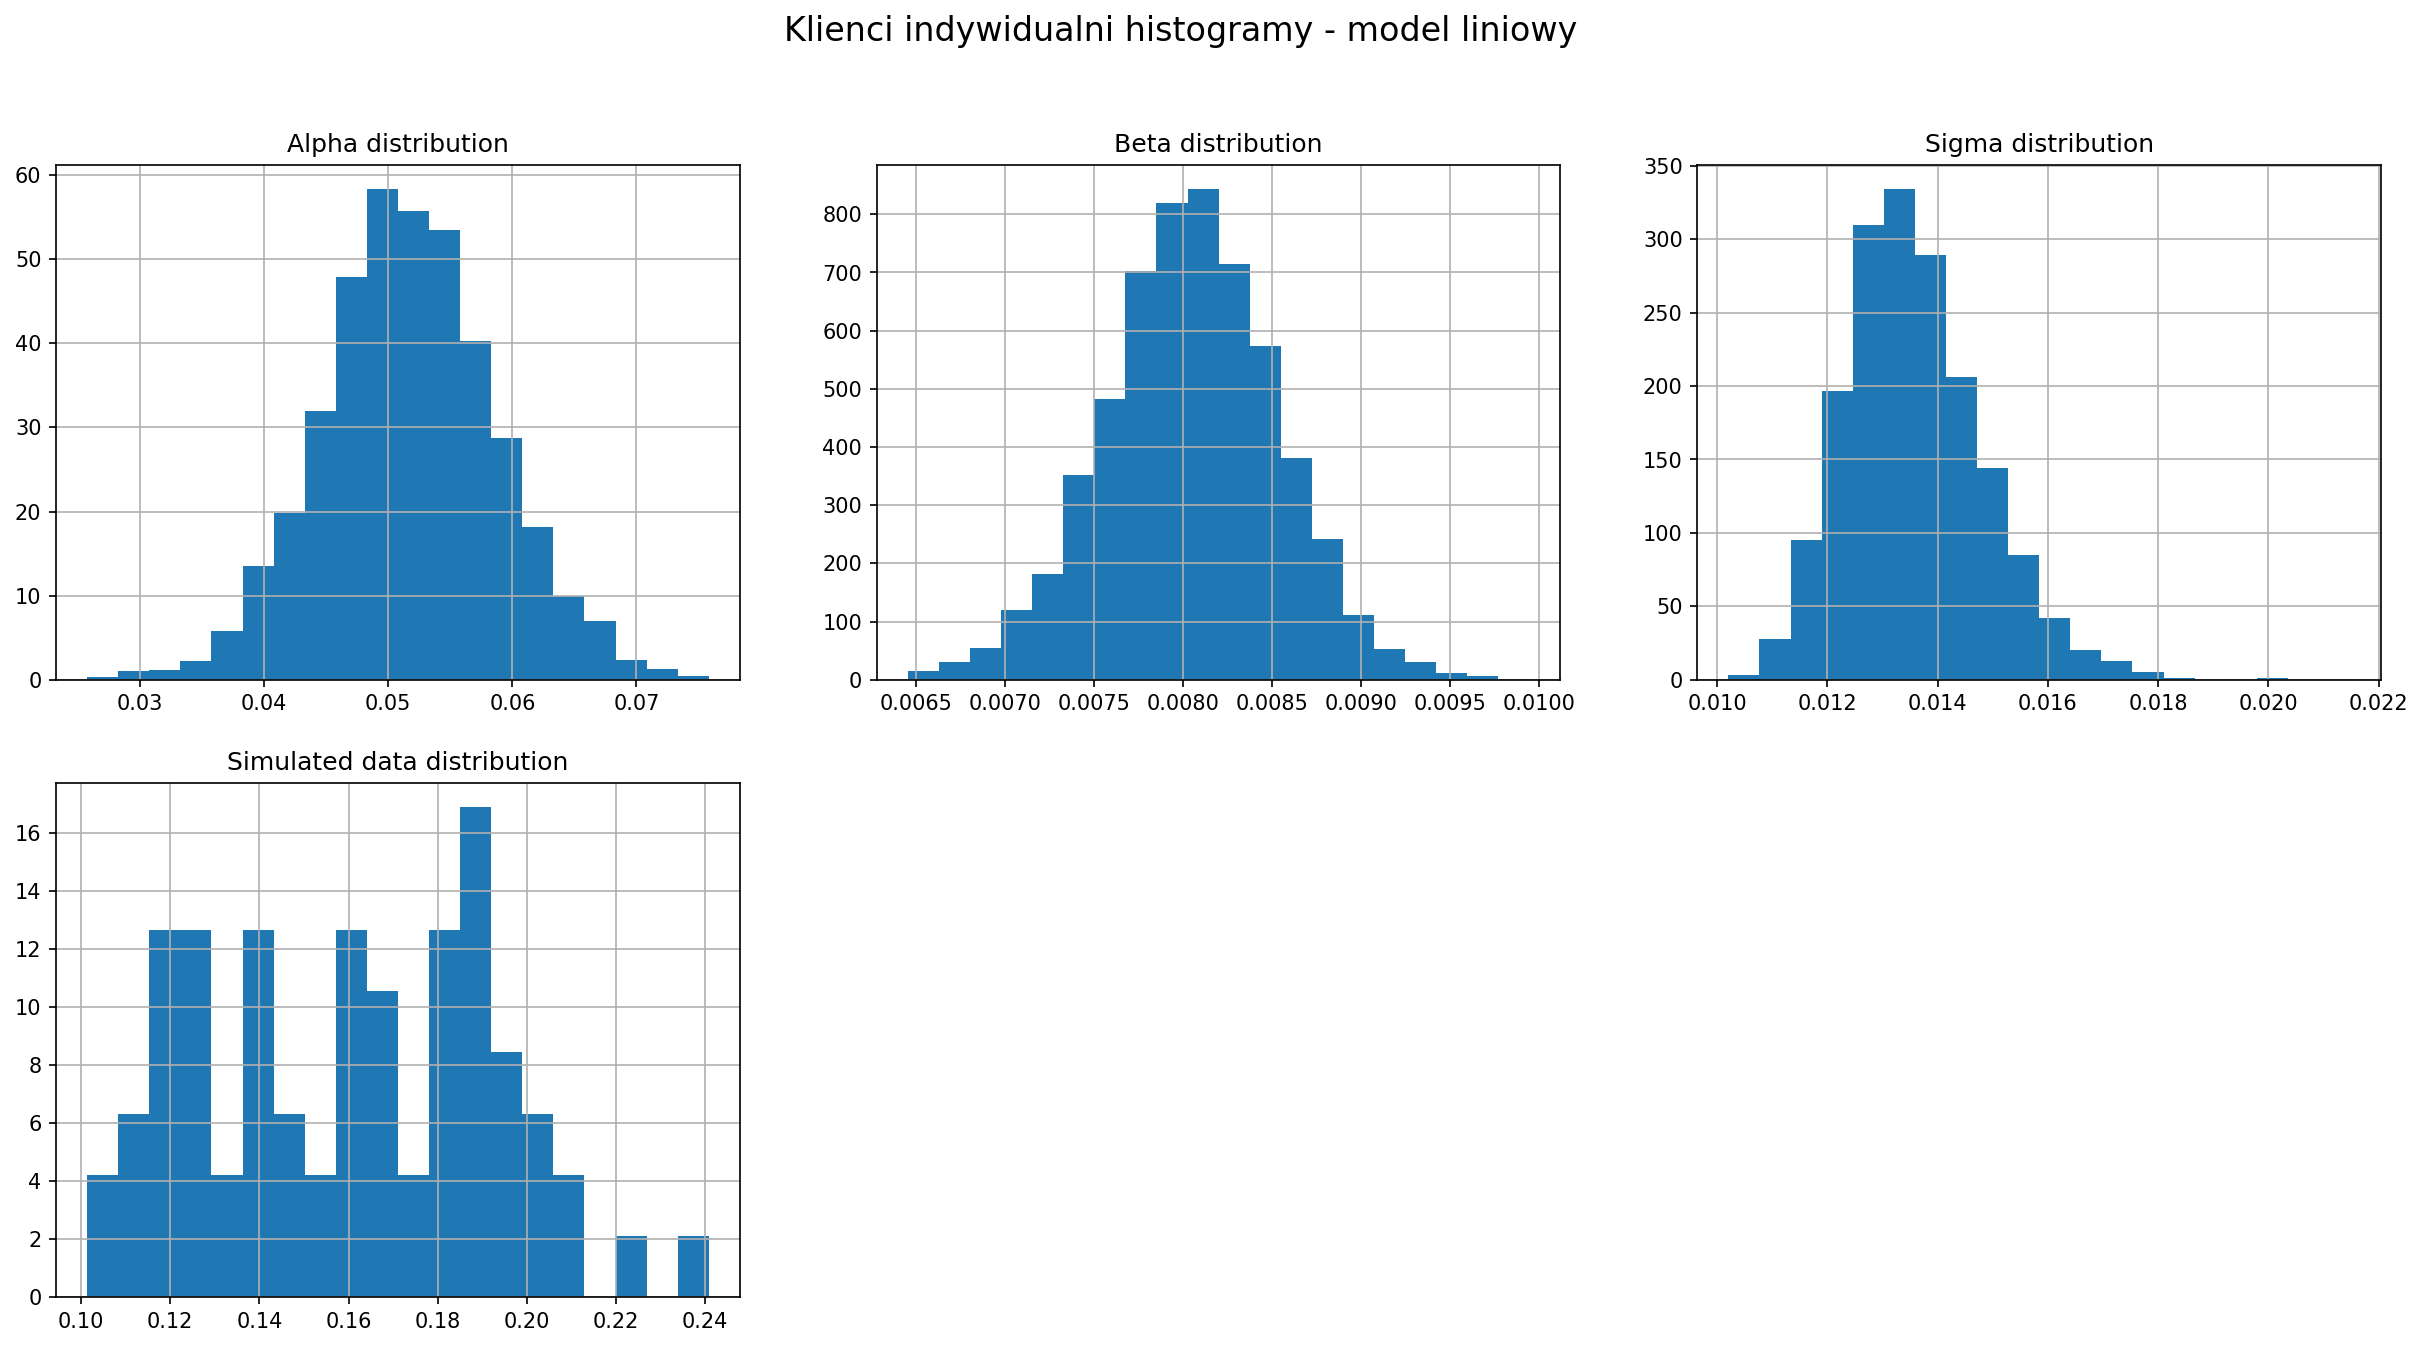

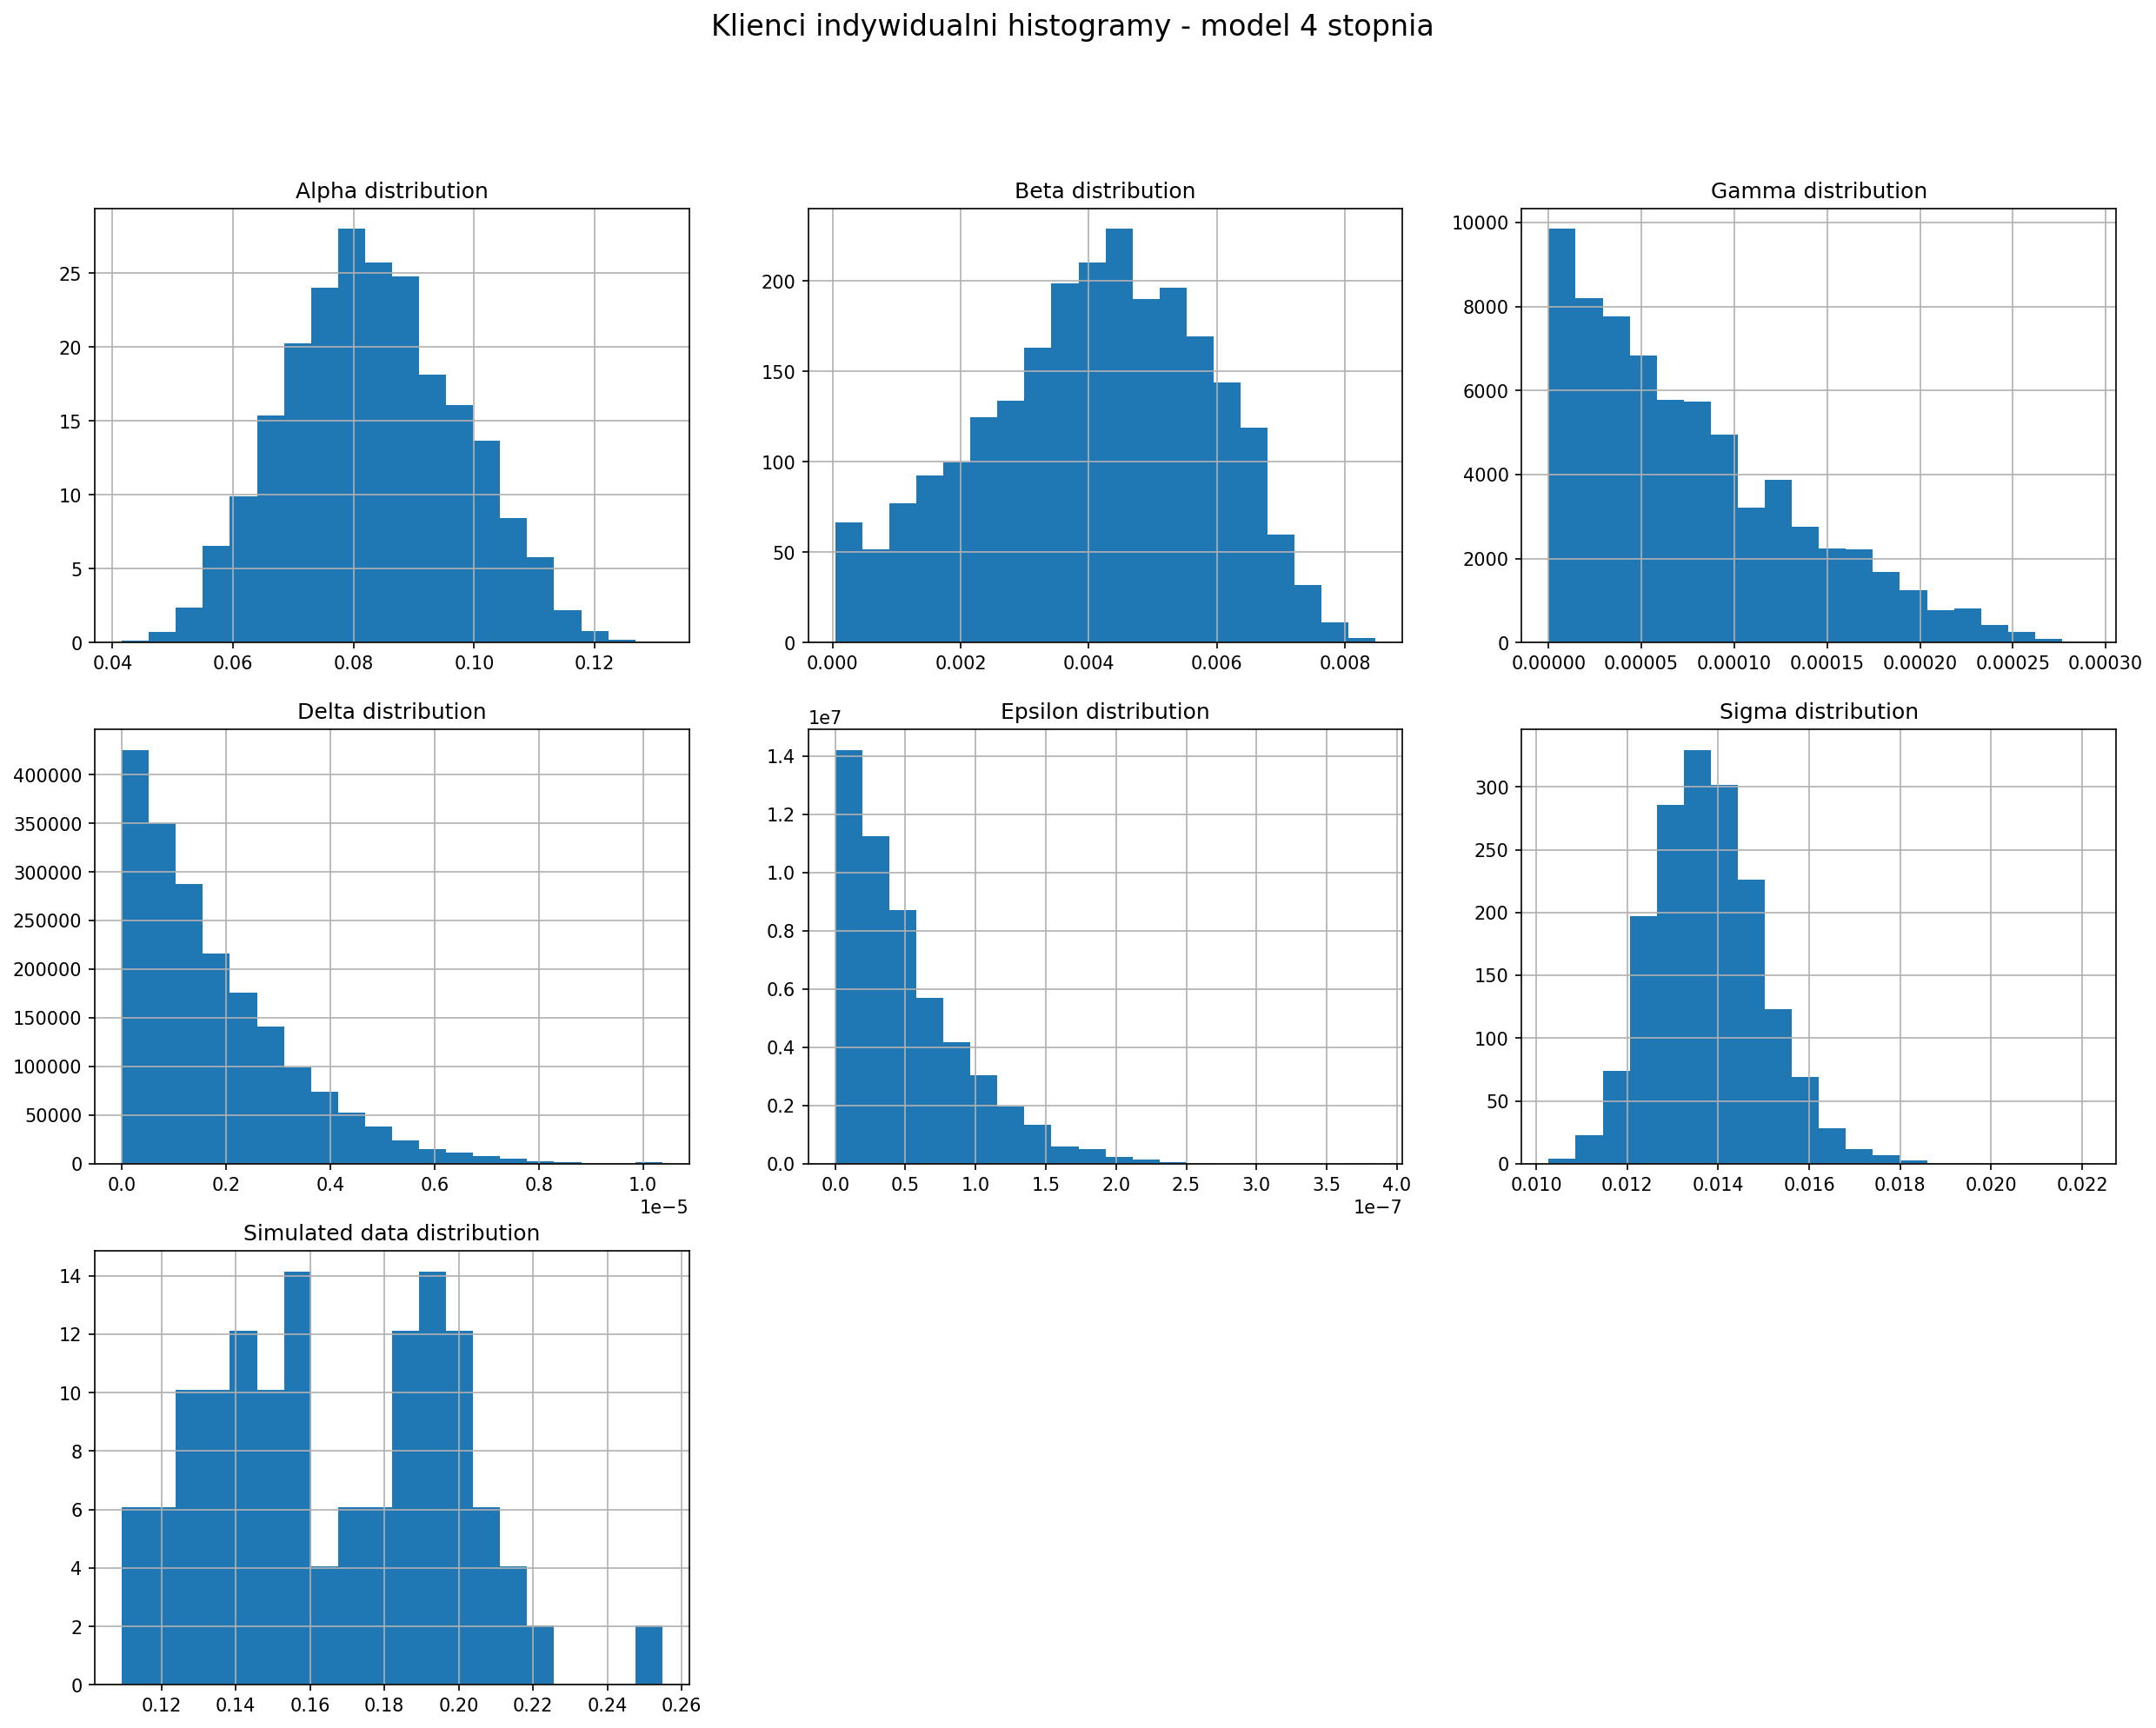

In [65]:
# Histogramy dla klijentów indywidualnych
PlotFitParameterHistograms(h_fit_degree1, 1, 'Klienci indywidualni histogramy - model liniowy')
PlotFitParameterHistograms(h_fit_degree4, 4, 'Klienci indywidualni histogramy - model 4 stopnia')

c:\Users\Jasio\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:490: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (68) in plot_posterior, generating only 40 plots
  warnings.warn(
c:\Users\Jasio\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:490: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (68) in plot_posterior, generating only 40 plots
  warnings.warn(


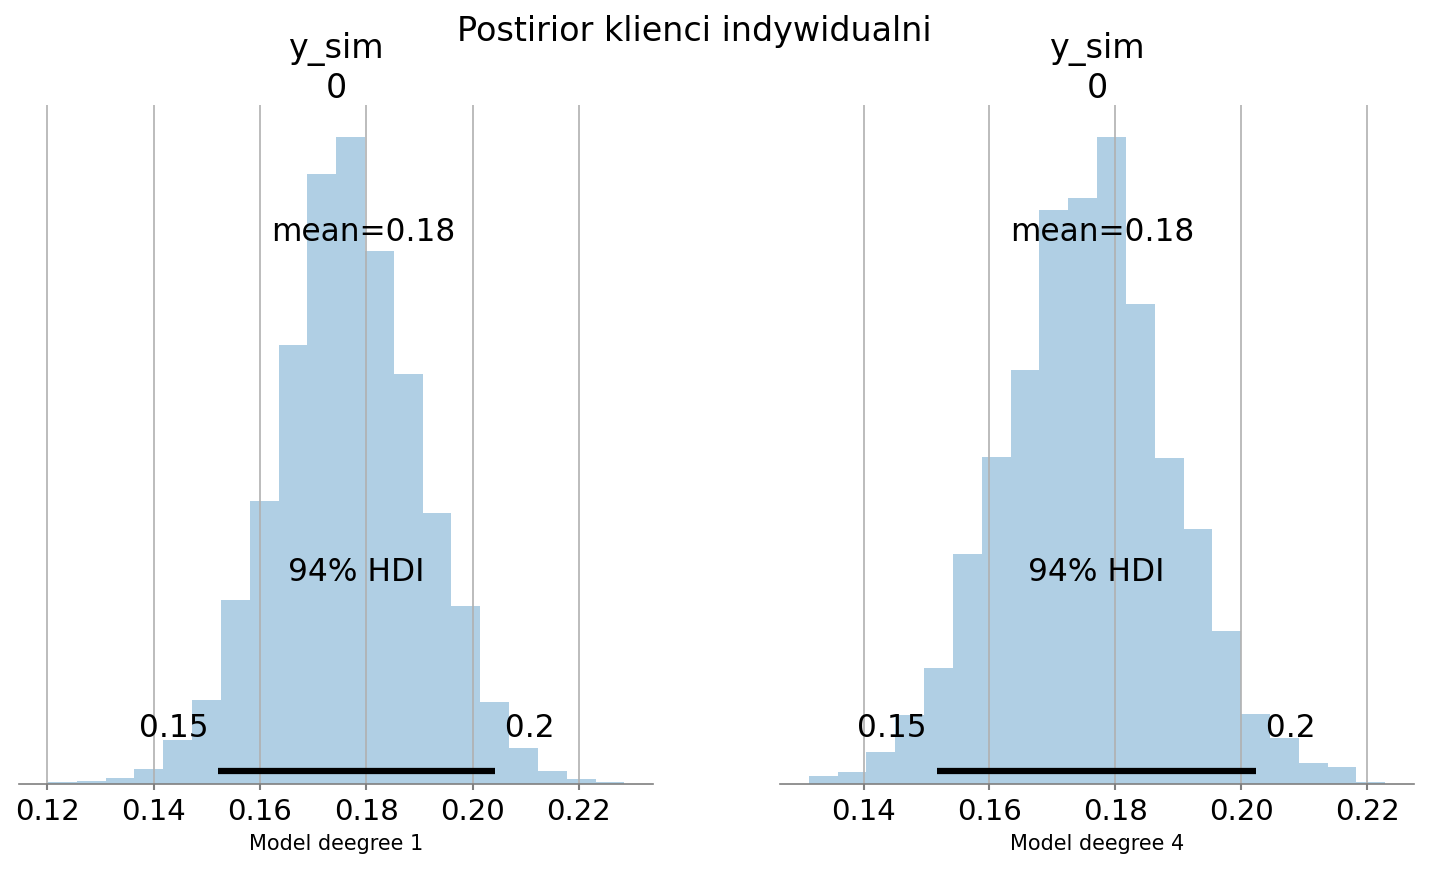

In [66]:
AzPostirior(h_fit_degree1, h_fit_degree2, 'Postirior klienci indywidualni')

Dopasowanie wielomianem rzędu = 1 ------------------------------
alpha = 0.070612373375, beta = 0.005256523282500001, gamma = None, delta = None, epsilon = None
sigma = 0.009969896092500001
Total difference: 449.91570113989906
Dopasowanie wielomianem rzędu = 4 ------------------------------
alpha = 0.08849043075, beta = 0.0013734876060674998, gamma = 0.000108631215054075, delta = 5.1242871224475e-06, epsilon = 2.07216953686e-07
sigma = 0.009529280942500001
Total difference: 591.6798182459489


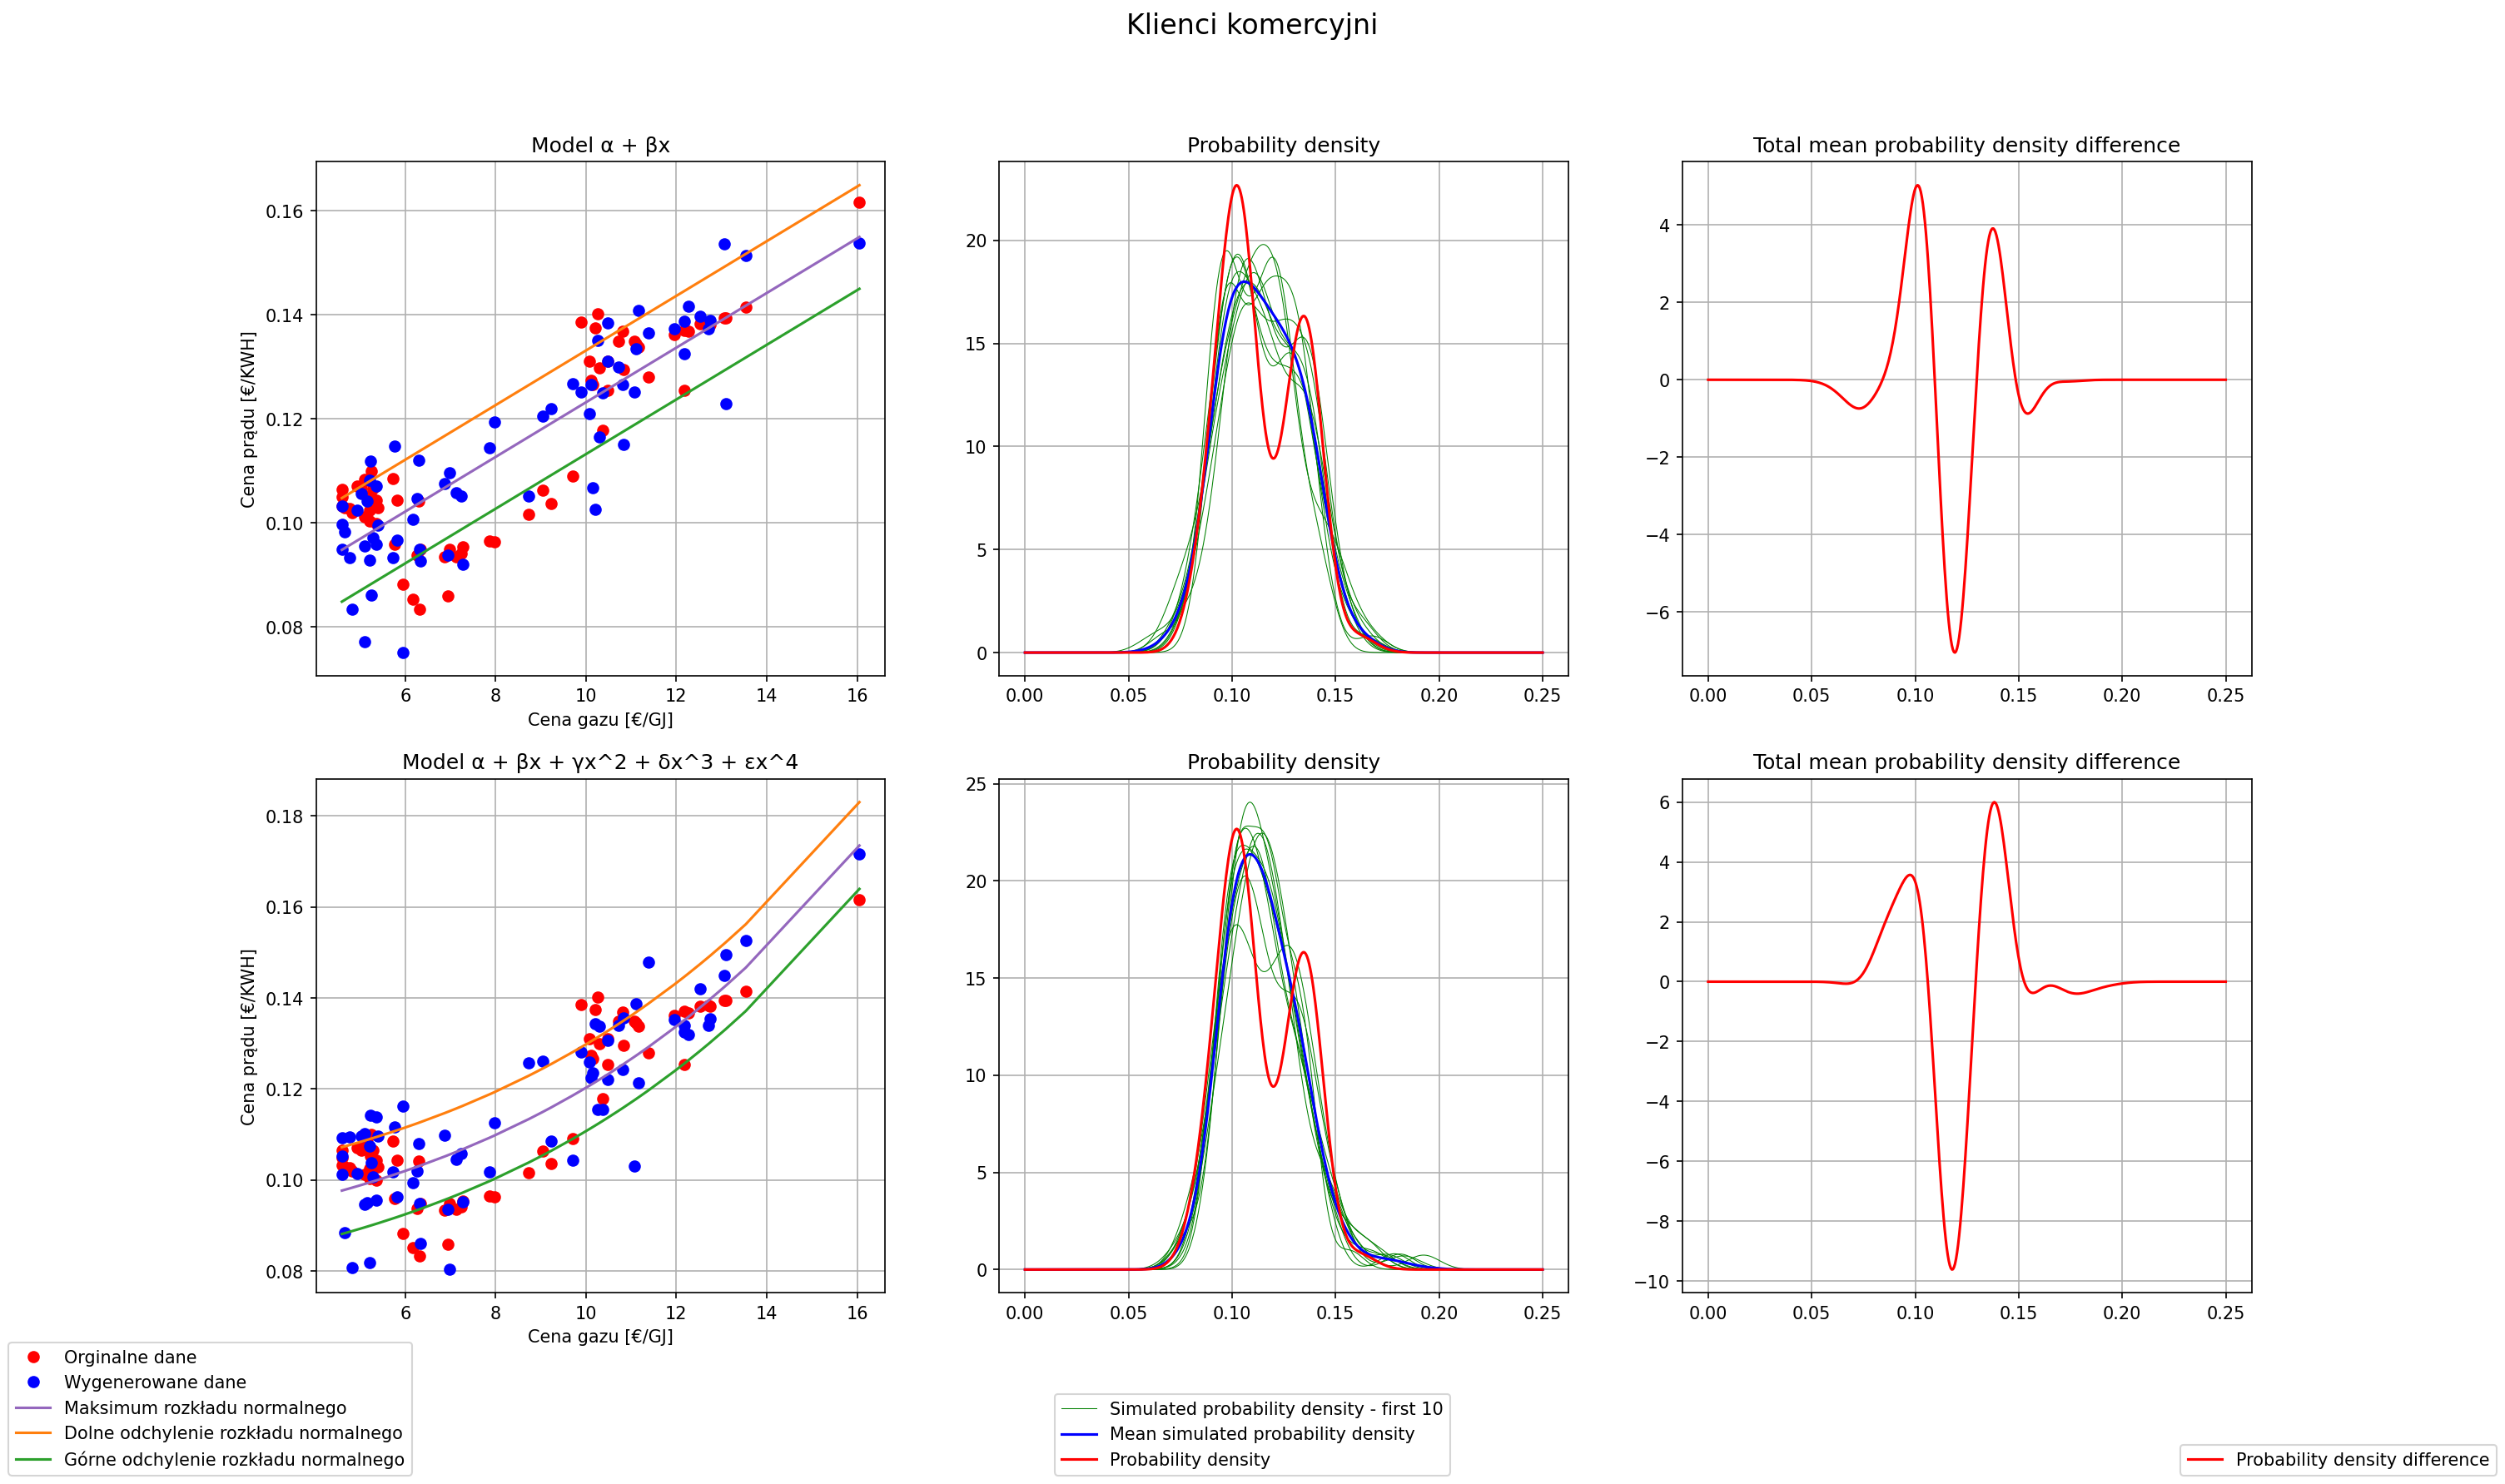

In [67]:
f, axs = plt.subplots(2, 3, figsize=(20,12), dpi=150)

# Wielomian stopnia 1
PlotFitedData(gi_mean_list, ei_mean_list, i_fit_degree1, 1, axs[0, 0], alternatedTitle=True)
(i_density1, i_sim_density1, ui1) = PlotProbabilityDensity(ei_mean_list, i_fit_degree1, 1, axs[0, 1], densityNum=10, linEnd=0.25, alternatedTitle=True)
PlotDensityDifference(i_density1, i_sim_density1, ui1, 1, axs[0, 2], alternatedTitle=True)

# Wielomian stopnia 4
PlotFitedData(gi_mean_list, ei_mean_list, i_fit_degree4, 4, axs[1, 0], alternatedTitle=True)
(i_density4, i_sim_density4, ui4) = PlotProbabilityDensity(ei_mean_list, i_fit_degree4, 4, axs[1, 1], densityNum=10, linEnd=0.25, alternatedTitle=True)
PlotDensityDifference(i_density4, i_sim_density4, ui4, 4, axs[1, 2], alternatedTitle=True)

f.suptitle('Klienci komercyjni', fontsize=16)
plt.rcParams['axes.grid'] = True

handles1, labels1 = axs[0, 0].get_legend_handles_labels()
handles2, labels2 = axs[0, 1].get_legend_handles_labels()
handles3, labels3 = axs[0, 2].get_legend_handles_labels()

f.legend(handles1, labels1, loc='lower left')
f.legend(handles2, labels2, loc='lower center')
f.legend(handles3, labels3, loc='lower right')

plt.savefig('Klienci komercyjni - all.png', dpi=300, facecolor='w')
plt.show()

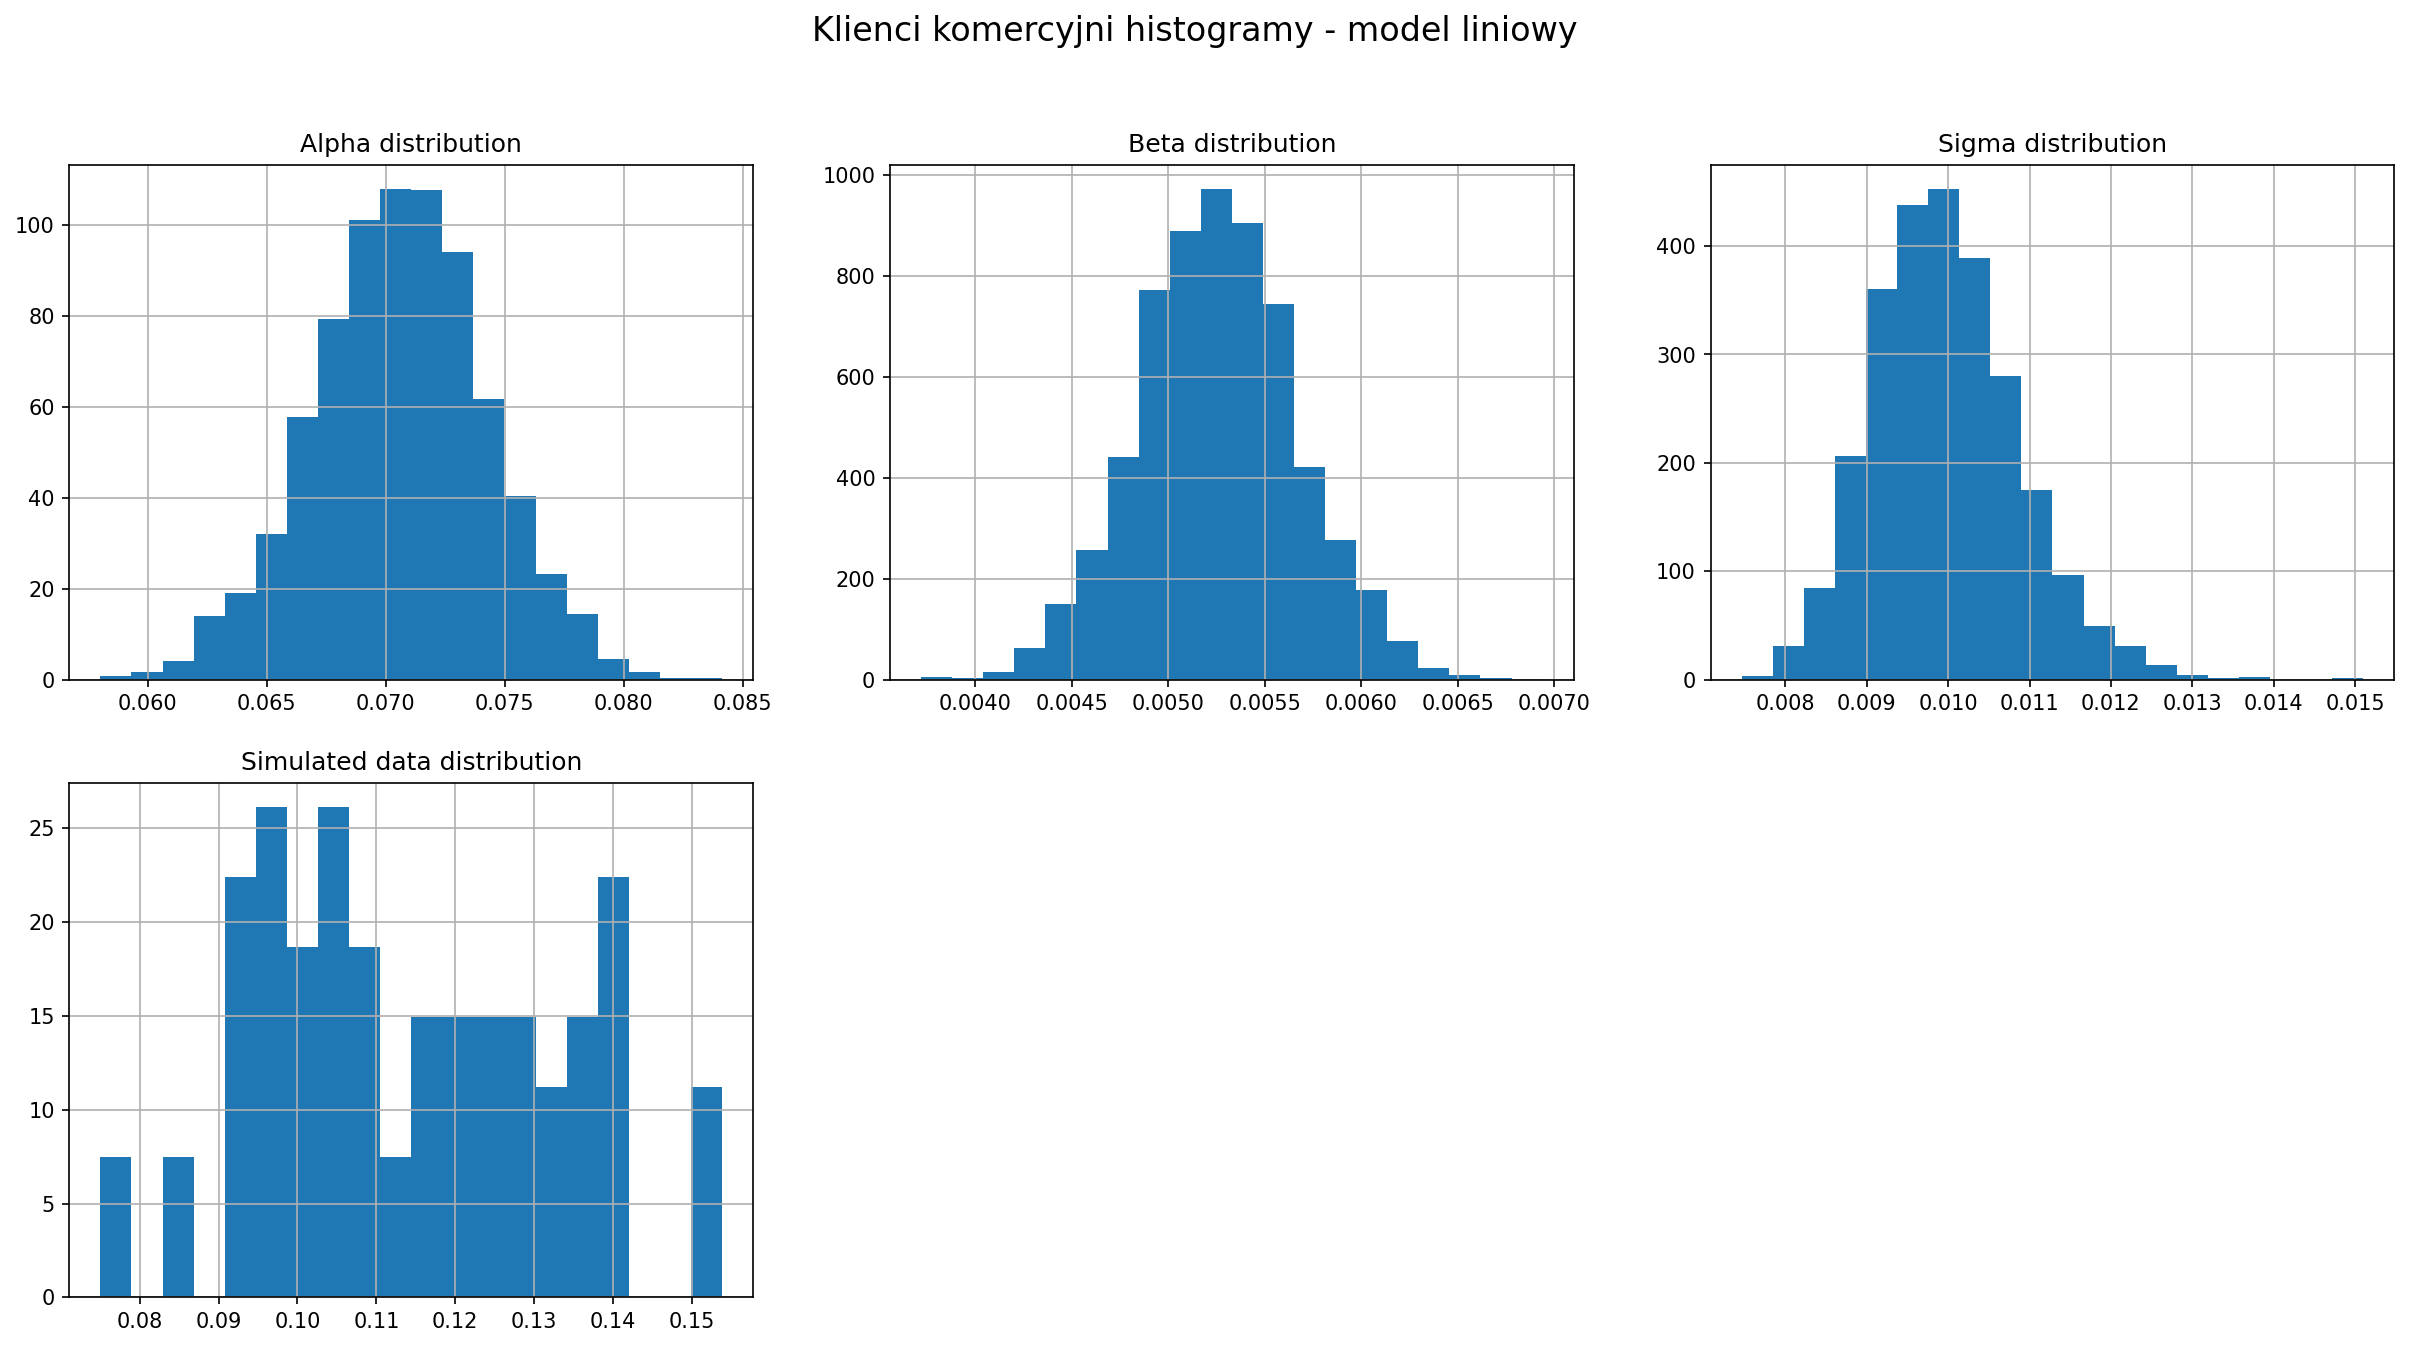

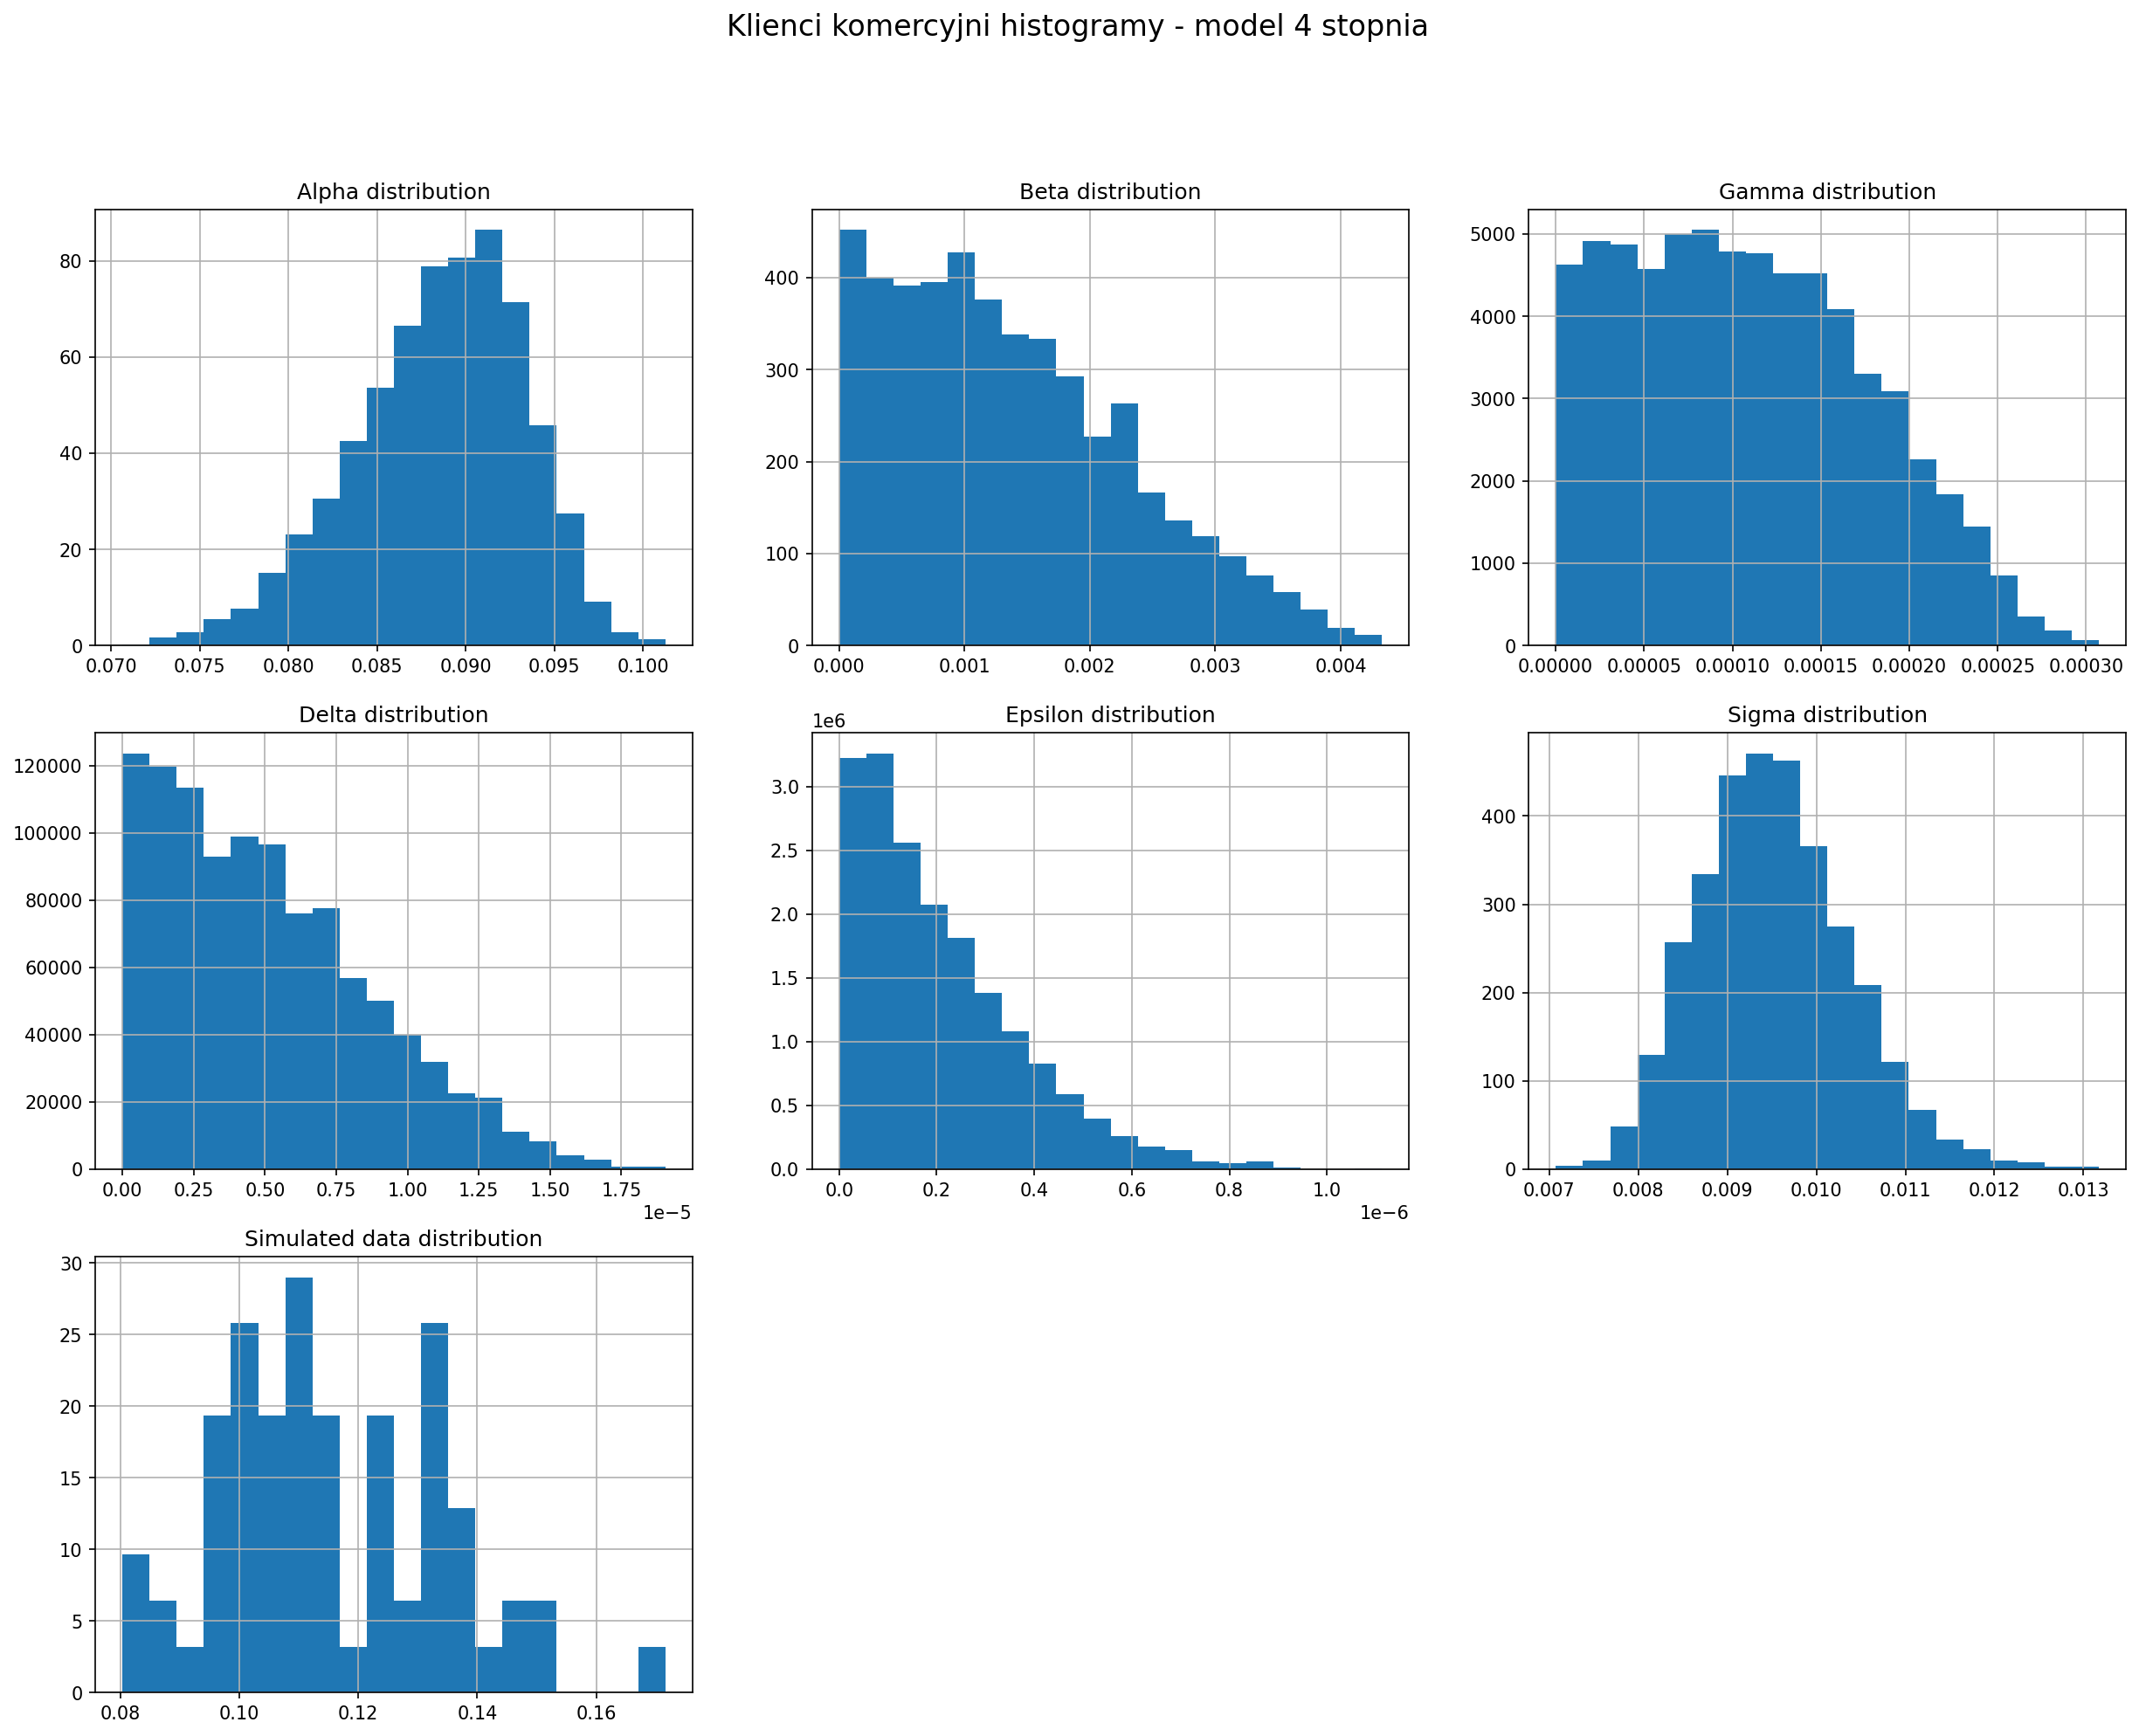

In [68]:
# Histogramy dla klijentów komercyjnych
PlotFitParameterHistograms(i_fit_degree1, 1, 'Klienci komercyjni histogramy - model liniowy')
PlotFitParameterHistograms(i_fit_degree4, 4, 'Klienci komercyjni histogramy - model 4 stopnia')

c:\Users\Jasio\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:490: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (68) in plot_posterior, generating only 40 plots
  warnings.warn(
c:\Users\Jasio\anaconda3\lib\site-packages\arviz\plots\plot_utils.py:490: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (68) in plot_posterior, generating only 40 plots
  warnings.warn(


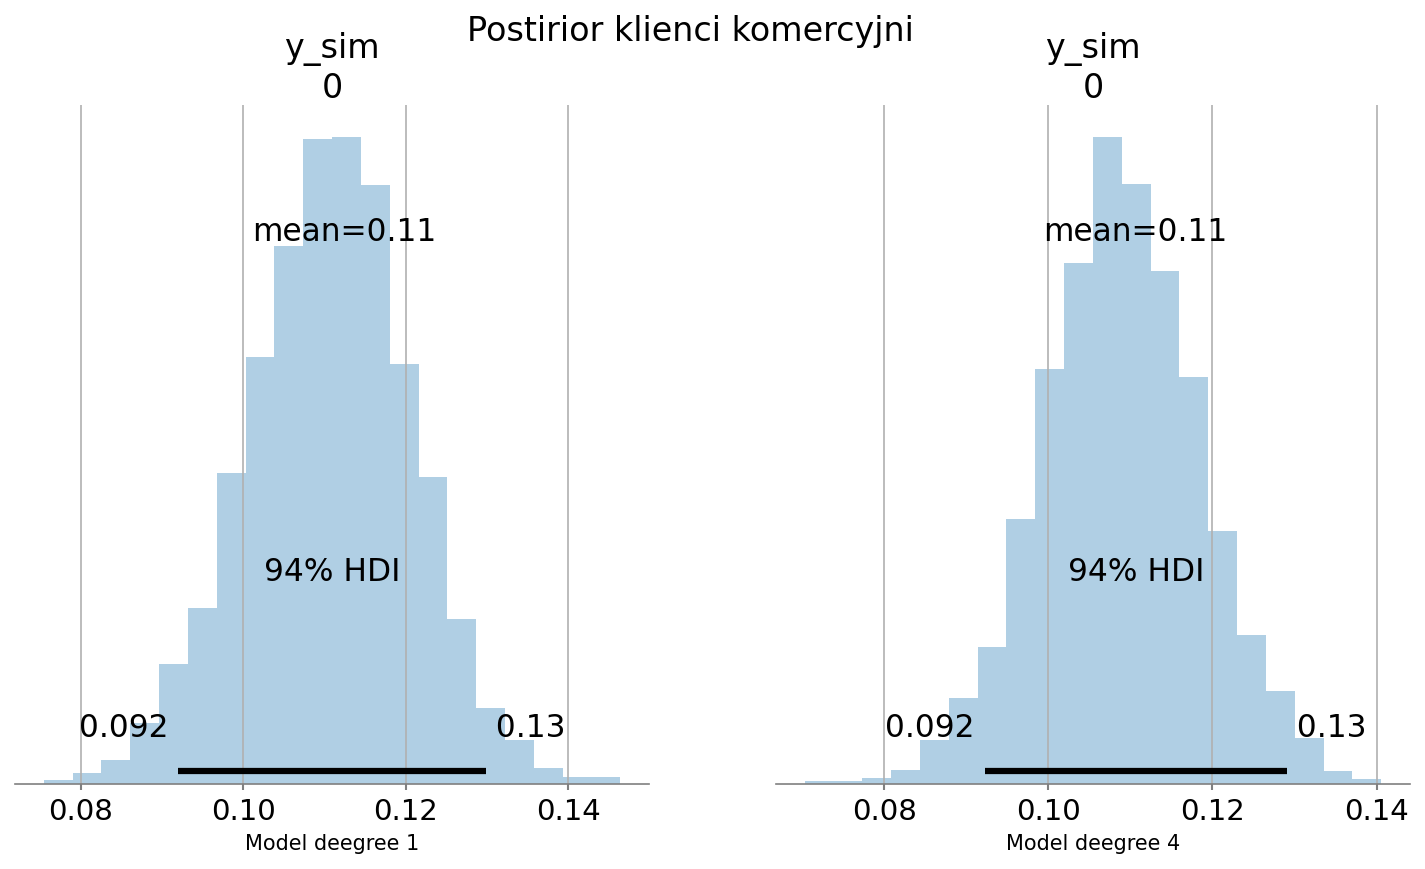

In [69]:
AzPostirior(i_fit_degree1, i_fit_degree2, 'Postirior klienci komercyjni')

# Diagnostyka

In [70]:
def PrintLongLine():
    print('-' * 100)

In [71]:
print(h_fit_degree1.diagnose())
PrintLongLine()

Processing csv files: C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_1-20220618175829_1.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_1-20220618175829_2.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_1-20220618175829_3.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_1-20220618175829_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.

----------------------------------------------------------------------------------------------------


In [72]:
print(h_fit_degree2.diagnose())
PrintLongLine()

Processing csv files: C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_2-20220618175830_1.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_2-20220618175830_2.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_2-20220618175830_3.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_2-20220618175830_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.

----------------------------------------------------------------------------------------------------


In [73]:
print(h_fit_degree3.diagnose())
PrintLongLine()

Processing csv files: C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_3-20220618175831_1.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_3-20220618175831_2.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_3-20220618175831_3.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_3-20220618175831_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.

----------------------------------------------------------------------------------------------------


In [74]:
print(h_fit_degree4.diagnose())
PrintLongLine()

Processing csv files: C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_4-20220618175834_1.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_4-20220618175834_2.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_4-20220618175834_3.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_4-20220618175834_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2 of 4000 (0.05%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.

---------------------------------------------------------------------------------

In [75]:
print(i_fit_degree1.diagnose())
PrintLongLine()

Processing csv files: C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_1-20220618175836_1.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_1-20220618175836_2.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_1-20220618175836_3.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_1-20220618175836_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.

----------------------------------------------------------------------------------------------------


In [76]:
print(i_fit_degree2.diagnose())
PrintLongLine()

Processing csv files: C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_2-20220618175837_1.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_2-20220618175837_2.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_2-20220618175837_3.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_2-20220618175837_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
302 of 4000 (7.55%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

The following parameters had split R-hat greater than 1.05:
  alpha, beta, gamma, sigma, y_sim[68]
Such high values indicate incomplete mixing and bia

In [77]:
print(i_fit_degree3.diagnose())
PrintLongLine()

Processing csv files: C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_3-20220618175838_1.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_3-20220618175838_2.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_3-20220618175838_3.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_3-20220618175838_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2 of 4000 (0.05%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.

---------------------------------------------------------------------------------

In [78]:
print(i_fit_degree4.diagnose())
PrintLongLine()

Processing csv files: C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_4-20220618175839_1.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_4-20220618175839_2.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_4-20220618175839_3.csv, C:\Users\Jasio\AppData\Local\Temp\tmpesfuq2ib\model_4-20220618175839_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
8 of 4000 (0.20%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.

---------------------------------------------------------------------------------

# Notatki

### Prior dla modeli stan
Prior dla wartości zmiennych wielomianu real<lower=0> wziął się z tąd że zależność nie może być ujemna(cena prądu nie może maleć przy wzroście ceny paliwa).


Prior dla beta normal(0.007,0.01) wzią się z:


    Dla elektrowni gazowych η ∈ (45%, 57%) => η ~= (45% + 57%) / 2 = 51%  https://www.sciencedirect.com/topics/engineering/natural-gas-combined-cycle
    1MJ ~= 277.78 KWh
    1 / (0.51 * 277.78) = 0.007058 ~= 0.007
    Natomiast odchylenie 0.01 jest większe o rząd wielkości ponieważ gaz stanowi tylko ~25% energii w EU. https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Energy_statistics_-_an_overview

Prior dla pozostałych wartości wielomianu jest równy normal(0,0.001) ponieważ kolejne stopnie nie mogą być ważniejsze od pierwszego ze względu na zestawiane wartości